In [1]:
import pandas as pd
import numpy as np
crsp = pd.read_pickle('Data/crsp.pkl')
bm = pd.read_csv('Data/Fundamentals/BM.csv')
cash_assets = pd.read_csv('Data/Fundamentals/Cash.csv')
gross_profitability = pd.read_csv('Data/Fundamentals/GP.csv')
mlev = pd.read_csv('Data/Fundamentals/Leverage.csv')
poy = pd.read_csv('Data/Fundamentals/PayoutYield.csv')
sales_growth = pd.read_csv('Data/Fundamentals/sgr.csv')
assets_growth = pd.read_csv('Data/Fundamentals/AssetGrowth.csv')
RoE = pd.read_csv('Data/Fundamentals/RoE.csv')
am = pd.read_csv('Data/Fundamentals/AM.csv')
blev = pd.read_csv('Data/Fundamentals/BookLeverage.csv')
asset_turnover = pd.read_csv('Data/Fundamentals/AssetTurnover.csv')


In [10]:
bm.rename(columns={'BM':'logBM'}, inplace=True)
bm.rename(columns={'yyyymm':'date'}, inplace=True)
cash_assets.rename(columns={'yyyymm':'date'}, inplace=True)
gross_profitability.rename(columns={'yyyymm':'date'}, inplace=True)
mlev.rename(columns={'yyyymm':'date'}, inplace=True)
poy.rename(columns={'yyyymm':'date'}, inplace=True)
sales_growth.rename(columns={'yyyymm':'date'}, inplace=True)
assets_growth.rename(columns={'yyyymm':'date'}, inplace=True)
RoE.rename(columns={'yyyymm':'date'}, inplace=True)
am.rename(columns={'yyyymm':'date'}, inplace=True)
blev.rename(columns={'yyyymm':'date'}, inplace=True)
asset_turnover.rename(columns={'yyyymm':'date'}, inplace=True)

In [11]:
import pandas as pd

def convert_yyyymm_to_period(series):
    """
    Converts a Series of dates in yyyymm format to Period[M] objects (i.e., yyyy-mm).
    Handles strings or integers, but not full date strings like yyyy-mm-dd.
    """
    series = series.astype(str).str.replace('-', '').str.zfill(6)

    # Ensure values are purely digits and 6 characters long
    mask = series.str.match(r'^\d{6}$')
    if not mask.all():
        raise ValueError("Some values in the series are not in yyyymm format.")

    return pd.to_datetime(series + '01', format='%Y%m%d')


bm['date'] = convert_yyyymm_to_period(bm['date'])
cash_assets['date'] = convert_yyyymm_to_period(cash_assets['date'])
gross_profitability['date'] = convert_yyyymm_to_period(gross_profitability['date'])
mlev['date'] = convert_yyyymm_to_period(mlev['date'])
poy['date'] = convert_yyyymm_to_period(poy['date'])
sales_growth['date'] = convert_yyyymm_to_period(sales_growth['date'])
assets_growth['date'] = convert_yyyymm_to_period(assets_growth['date'])
RoE['date'] = convert_yyyymm_to_period(RoE['date'])
am['date'] = convert_yyyymm_to_period(am['date'])
blev['date'] = convert_yyyymm_to_period(blev['date'])
asset_turnover['date'] = convert_yyyymm_to_period(asset_turnover['date'])


In [87]:
from functools import reduce
dfs = [crsp, bm, cash_assets, gross_profitability, mlev, poy, sales_growth, assets_growth, RoE, am, blev, asset_turnover]

# Reduce merges all DataFrames on 'permno' and 'date'
df = reduce(lambda left, right: pd.merge(left, right, on=['permno', 'date'], how='inner'), dfs)

In [179]:
#Baseline Variables
df.rename(columns={'book_equity': 'BE'}, inplace=True)
df.rename(columns={'market_equity': 'ME'}, inplace=True)
df['payout'] = df['PayoutYield'] * df['ME'].shift(6)
df['at'] = df['AM'] * df['ME']

#Valuation Measures
df.rename(columns={'logBM': 'bm'}, inplace=True)
df['poy'] = np.log(1+ df['payout']/df['ME'])
df['sales'] = df['AssetTurnover'] * df['at']
df['yy'] = np.log(df['sales']/df['ME'])

#Growth Measures
df['beg'] = np.log(df['BE']/df['BE'].shift(1))
df['ag'] = np.log(df['AssetGrowth'])
df['yg'] = np.log(df['sgr'])

#Profitability Measures
df['csprof'] = np.log(1+ (df['payout']+df['BE']-df['BE'])/df['BE'].shift(1))
df['roe'] = np.log(df['RoE'])
df['gprof'] = np.log(df['GP'])

#Capital Structure Measures
df.rename(columns={'Leverage': 'mlev'}, inplace=True)
df['blev'] = np.log(df['BookLeverage'])
df.rename(columns={'Cash': 'cash'}, inplace=True)


In [180]:
df

,permno,date,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,gprof,mlev,blev,cash,year,month,predicted_fundamental_value,mispricing,signal,fundamental-market-ratio-ridge
0,10001,1989-03-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,-2.110511,0.923774,0.476621,0.050148,1989,3,1.224157e+09,-1.217420e+09,1.217420e+09,181.720004
1,10001,1989-04-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,-2.110511,0.860065,0.476621,0.050148,1989,4,1.277759e+09,-1.270524e+09,1.270524e+09,176.595817
2,10001,1989-05-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,-2.110511,0.890782,0.476621,0.050148,1989,5,1.230154e+09,-1.223168e+09,1.223168e+09,176.088469
3,10001,1989-08-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,-2.110511,0.672085,0.476621,0.063399,1989,8,1.526963e+09,-1.517704e+09,1.517704e+09,164.912150
4,10001,1989-09-01,NaT,11.0,3.0,4920.0,39040610,GFGC,GREAT FALLS GAS CO,,...,-2.110511,0.688109,0.476621,0.063399,1989,9,1.448230e+09,-1.439187e+09,1.439187e+09,160.138246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770993,93434,2015-06-01,NaT,11.0,3.0,9999.0,78513510,SANW,S & W SEED CO,,...,-2.192220,0.575519,0.548073,0.022004,2015,6,1.485373e+09,-1.419717e+09,1.419717e+09,22.623728
770994,93434,2015-07-01,NaT,11.0,3.0,9999.0,78513510,SANW,S & W SEED CO,,...,-2.192220,0.628307,0.548073,0.022004,2015,7,1.448627e+09,-1.388487e+09,1.388487e+09,24.087824
770995,93434,2015-09-01,NaT,11.0,3.0,9999.0,78513510,SANW,S & W SEED CO,,...,-2.192220,0.610142,0.548073,0.028894,2015,9,1.463382e+09,-1.401452e+09,1.401452e+09,23.629684
770996,93434,2015-10-01,NaT,11.0,3.0,9999.0,78513510,SANW,S & W SEED CO,,...,-2.192220,0.610565,0.548073,0.028894,2015,10,1.467490e+09,-1.405603e+09,1.405603e+09,23.712415


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# =====================================
# STEP 1: DEFINE ALL VARIABLES
# =====================================

# You need to provide these as pandas DataFrames with:
# - Rows: firm-year observations
# - Columns: the variables defined below

# === Valuation Measures ===
# bm = log book-to-market ratio
# poy = payout yield = ln(1 + PO/ME)
# yy = sales yield = ln(Y/ME)

# === Growth Measures ===
# beg = book equity growth = ln(BE_t/BE_t-1)
# ag = asset growth = ln(A_t/A_t-1)
# yg = sales growth = ln(Y_t/Y_t-1)

# === Profitability Measures ===
# csprof = clean surplus profitability = ln(1 + (PO + ΔBE)/BE_t-1)
# roe = return on equity = ln(1 + E/((BE_t + BE_t-1)/2))
# gprof = gross profitability = ln(1 + GP/((A_t + A_t-1)/2))

# === Capital Structure Measures ===
# mlev = market leverage = B/(ME + B)
# blev = book leverage = B/A
# cash = cash holdings = C/A

# === Other Required Variables ===
# BE = book equity
# ME = market equity
# firm_id = firm identifier
# year = year

# Example structure (you'll replace with your actual data):
# df = pd.DataFrame({
#     'firm_id': [...],
#     'year': [...],
#     'BE': [...],
#     'ME': [...],
#     'bm': [...],
#     'poy': [...],
#     'yy': [...],
#     'beg': [...],
#     'ag': [...],
#     'yg': [...],
#     'csprof': [...],
#     'roe': [...],
#     'gprof': [...],
#     'mlev': [...],
#     'blev': [...],
#     'cash': [...]
# })



In [111]:
# Since the paper uses annual data, we need to aggregate monthly data
# We'll use June of each year (month 6) to match the paper's methodology

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Filter to June observations only (or December if that's when fiscal year ends)
# You can adjust this based on your fiscal year convention
df_annual = df[df['month'] == 6].copy()

# Alternatively, if you want to use December values for market equity
# but annual accounting data, you might need a more complex merge
# For now, we'll use June to match the paper

# Sort by permno and year
df_annual = df_annual.sort_values(['permno', 'year'])

In [15]:
# =====================================
# STEP 2: SET PARAMETERS
# =====================================

# Number of periods for finite sum
H = 100

# Adjustment parameter for VAR stability
theta = 0.8  # Since theta^10 = 0.1

# State variable names in order
state_vars = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']

# Number of state variables
n_vars = len(state_vars)



In [18]:
# =====================================
# COMPREHENSIVE DATA QUALITY IMPROVEMENT
# =====================================

print("Analyzing data completeness for all state variables...")

# First, let's understand the missing data pattern
print("\n1. MISSING DATA ANALYSIS")
print("="*50)

# Check missing values for each variable
missing_summary = pd.DataFrame({
    'variable': state_vars,
    'missing_count': [df_annual[var].isna().sum() for var in state_vars],
    'missing_pct': [100 * df_annual[var].isna().sum() / len(df_annual) for var in state_vars]
}).sort_values('missing_pct', ascending=False)

print(missing_summary)

# Check which variables are missing together
print("\n2. MISSING DATA PATTERNS")
print("="*50)

# Create missing indicator matrix
missing_matrix = df_annual[state_vars].isna()
missing_patterns = missing_matrix.value_counts().head(10)
print("Top 10 missing patterns:")
print(missing_patterns)

# =====================================
# STEP 1: RECONSTRUCT MISSING VARIABLES
# =====================================

print("\n3. RECONSTRUCTING MISSING VARIABLES")
print("="*50)

df_reconstructed = df_annual.copy()

# If you're missing some variables, here's how to reconstruct them:

# 1. Payout Yield (poy)
if df_reconstructed['poy'].isna().sum() > 0:
    print("\nReconstructing payout yield...")
    # poy = ln(1 + PO/ME)
    # If you have dividends and share repurchases separately:
    if 'dividends' in df_reconstructed.columns and 'repurchases' in df_reconstructed.columns:
        PO = df_reconstructed['dividends'] + df_reconstructed['repurchases'] - df_reconstructed.get('issuances', 0)
        df_reconstructed['poy'] = np.log(1 + PO / df_reconstructed['ME'])
    # Or use a simple approximation
    else:
        # Use dividend yield as proxy if available
        if 'div_yield' in df_reconstructed.columns:
            df_reconstructed['poy'] = np.log(1 + df_reconstructed['div_yield'])

# 2. Sales Yield (yy)
if df_reconstructed['yy'].isna().sum() > 0:
    print("\nReconstructing sales yield...")
    # yy = ln(Y/ME) where Y is sales/revenue
    if 'sales' in df_reconstructed.columns:
        df_reconstructed['yy'] = np.log(df_reconstructed['sales'] / df_reconstructed['ME'])
    elif 'revenue' in df_reconstructed.columns:
        df_reconstructed['yy'] = np.log(df_reconstructed['revenue'] / df_reconstructed['ME'])

# 3. Growth measures - reconstruct from levels
if df_reconstructed['beg'].isna().sum() > 0:
    print("\nReconstructing book equity growth...")
    df_reconstructed = df_reconstructed.sort_values(['permno', 'year'])
    df_reconstructed['BE_lag'] = df_reconstructed.groupby('permno')['BE'].shift(1)
    df_reconstructed['beg'] = np.log(df_reconstructed['BE'] / df_reconstructed['BE_lag'])

if df_reconstructed['ag'].isna().sum() > 0 and 'assets' in df_reconstructed.columns:
    print("\nReconstructing asset growth...")
    df_reconstructed['assets_lag'] = df_reconstructed.groupby('permno')['assets'].shift(1)
    df_reconstructed['ag'] = np.log(df_reconstructed['assets'] / df_reconstructed['assets_lag'])

if df_reconstructed['yg'].isna().sum() > 0 and 'sales' in df_reconstructed.columns:
    print("\nReconstructing sales growth...")
    df_reconstructed['sales_lag'] = df_reconstructed.groupby('permno')['sales'].shift(1)
    df_reconstructed['yg'] = np.log(df_reconstructed['sales'] / df_reconstructed['sales_lag'])

# 4. Profitability measures
if df_reconstructed['csprof'].isna().sum() > 0:
    print("\nReconstructing clean surplus profitability...")
    # csprof = ln(1 + (PO + ΔBE)/BE_t-1)
    df_reconstructed['BE_change'] = df_reconstructed['BE'] - df_reconstructed['BE_lag']
    if 'PO' not in df_reconstructed.columns:
        # Approximate with net income if available
        if 'net_income' in df_reconstructed.columns:
            df_reconstructed['csprof'] = np.log(1 + 
                (df_reconstructed['net_income'] + df_reconstructed['BE_change']) / 
                df_reconstructed['BE_lag'])

if df_reconstructed['roe'].isna().sum() > 0 and 'net_income' in df_reconstructed.columns:
    print("\nReconstructing ROE...")
    avg_be = (df_reconstructed['BE'] + df_reconstructed['BE_lag']) / 2
    df_reconstructed['roe'] = np.log(1 + df_reconstructed['net_income'] / avg_be)

if df_reconstructed['gprof'].isna().sum() > 0:
    print("\nReconstructing gross profitability...")
    if 'gross_profit' in df_reconstructed.columns and 'assets' in df_reconstructed.columns:
        df_reconstructed['assets_lag'] = df_reconstructed.groupby('permno')['assets'].shift(1)
        avg_assets = (df_reconstructed['assets'] + df_reconstructed['assets_lag']) / 2
        df_reconstructed['gprof'] = np.log(1 + df_reconstructed['gross_profit'] / avg_assets)

# 5. Capital structure measures
if df_reconstructed['mlev'].isna().sum() > 0:
    print("\nReconstructing market leverage...")
    if 'total_debt' in df_reconstructed.columns:
        df_reconstructed['mlev'] = df_reconstructed['total_debt'] / (
            df_reconstructed['ME'] + df_reconstructed['total_debt'])

if df_reconstructed['blev'].isna().sum() > 0:
    print("\nReconstructing book leverage...")
    if 'total_debt' in df_reconstructed.columns and 'assets' in df_reconstructed.columns:
        df_reconstructed['blev'] = df_reconstructed['total_debt'] / df_reconstructed['assets']

if df_reconstructed['cash'].isna().sum() > 0:
    print("\nReconstructing cash ratio...")
    if 'cash_and_equiv' in df_reconstructed.columns and 'assets' in df_reconstructed.columns:
        df_reconstructed['cash'] = df_reconstructed['cash_and_equiv'] / df_reconstructed['assets']

# =====================================
# STEP 2: INDUSTRY-BASED IMPUTATION
# =====================================

print("\n4. INDUSTRY-BASED IMPUTATION")
print("="*50)

# Add industry classification if not present
if 'sic' in df_reconstructed.columns:
    df_reconstructed['industry'] = df_reconstructed['sic'].astype(str).str[:2]
elif 'naics' in df_reconstructed.columns:
    df_reconstructed['industry'] = df_reconstructed['naics'].astype(str).str[:2]
else:
    # Use a simple size-based grouping as fallback
    df_reconstructed['industry'] = pd.qcut(df_reconstructed['ME'], q=10, labels=False)

# Impute using industry-year medians
for var in state_vars:
    missing_before = df_reconstructed[var].isna().sum()
    
    if missing_before > 0:
        # Try industry-year median first
        industry_year_median = df_reconstructed.groupby(['industry', 'year'])[var].transform('median')
        df_reconstructed[var].fillna(industry_year_median, inplace=True)
        
        # Then industry median
        industry_median = df_reconstructed.groupby('industry')[var].transform('median')
        df_reconstructed[var].fillna(industry_median, inplace=True)
        
        # Then year median
        year_median = df_reconstructed.groupby('year')[var].transform('median')
        df_reconstructed[var].fillna(year_median, inplace=True)
        
        # Finally overall median
        overall_median = df_reconstructed[var].median()
        df_reconstructed[var].fillna(overall_median, inplace=True)
        
        missing_after = df_reconstructed[var].isna().sum()
        print(f"{var}: {missing_before} -> {missing_after} missing values")

# =====================================
# STEP 3: CROSS-SECTIONAL RELATIONSHIPS
# =====================================

print("\n5. USING CROSS-SECTIONAL RELATIONSHIPS")
print("="*50)

# Use relationships between variables to fill remaining gaps
# For example, if book-to-market is missing but we have ME and BE:
if df_reconstructed['bm'].isna().sum() > 0:
    mask = df_reconstructed['bm'].isna() & df_reconstructed['BE'].notna() & df_reconstructed['ME'].notna()
    df_reconstructed.loc[mask, 'bm'] = np.log(df_reconstructed.loc[mask, 'BE'] / df_reconstructed.loc[mask, 'ME'])

# If profitability measures are correlated, use one to predict another
from sklearn.linear_model import LinearRegression

for target_var in ['csprof', 'roe', 'gprof']:
    if df_reconstructed[target_var].isna().sum() > 0:
        # Find which other profitability measures are available
        other_prof_vars = [v for v in ['csprof', 'roe', 'gprof'] if v != target_var]
        
        # Train on complete cases
        train_mask = df_reconstructed[[target_var] + other_prof_vars].notna().all(axis=1)
        if train_mask.sum() > 100:  # Need enough data
            X_train = df_reconstructed.loc[train_mask, other_prof_vars]
            y_train = df_reconstructed.loc[train_mask, target_var]
            
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Predict missing values
            predict_mask = df_reconstructed[target_var].isna() & df_reconstructed[other_prof_vars].notna().all(axis=1)
            if predict_mask.sum() > 0:
                X_pred = df_reconstructed.loc[predict_mask, other_prof_vars]
                df_reconstructed.loc[predict_mask, target_var] = model.predict(X_pred)
                print(f"Predicted {predict_mask.sum()} values for {target_var}")

# =====================================
# STEP 4: TEMPORAL SMOOTHING
# =====================================

print("\n6. TEMPORAL SMOOTHING")
print("="*50)

# Use EWMA or interpolation for smooth time series
df_reconstructed = df_reconstructed.sort_values(['permno', 'year'])

for var in state_vars:
    if df_reconstructed[var].isna().sum() > 0:
        # Interpolate within firms
        df_reconstructed[var] = df_reconstructed.groupby('permno')[var].apply(
            lambda x: x.interpolate(method='linear', limit_direction='both')
        )

# =====================================
# STEP 5: FINAL VALIDATION
# =====================================

print("\n7. FINAL DATA QUALITY CHECK")
print("="*50)

# Remove infinities and extreme values
for var in state_vars:
    # Replace infinities
    df_reconstructed[var].replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Winsorize at 0.1% and 99.9% to remove extreme outliers
    if df_reconstructed[var].notna().sum() > 0:
        p001 = df_reconstructed[var].quantile(0.001)
        p999 = df_reconstructed[var].quantile(0.999)
        df_reconstructed[var] = df_reconstructed[var].clip(lower=p001, upper=p999)

# Final missing value count
print("\nFinal missing value summary:")
final_missing = pd.DataFrame({
    'variable': state_vars,
    'missing_count': [df_reconstructed[var].isna().sum() for var in state_vars],
    'missing_pct': [100 * df_reconstructed[var].isna().sum() / len(df_reconstructed) for var in state_vars]
}).sort_values('missing_pct', ascending=False)

print(final_missing)

# Check how many observations have complete data
complete_mask = df_reconstructed[state_vars].notna().all(axis=1)
print(f"\nObservations with complete data: {complete_mask.sum()}/{len(df_reconstructed)} ({100*complete_mask.sum()/len(df_reconstructed):.1f}%)")

# Save the improved dataset
df_annual_improved = df_reconstructed.copy()

print("\nData quality improvement complete!")
print("You can now use df_annual_improved for VAR estimation with all 12 variables.")

Analyzing data completeness for all state variables...

1. MISSING DATA ANALYSIS
   variable  missing_count  missing_pct
5        yg          18293    26.080324
4        ag          18044    25.725325
7       roe          10952    15.614263
8     gprof            791     1.127728
0        bm              0     0.000000
1       poy              0     0.000000
2        yy              0     0.000000
3       beg              0     0.000000
6    csprof              0     0.000000
9      mlev              0     0.000000
10     blev              0     0.000000
11     cash              0     0.000000

2. MISSING DATA PATTERNS
Top 10 missing patterns:
bm     poy    yy     beg    ag     yg     csprof  roe    gprof  mlev   blev   cash 
False  False  False  False  False  False  False   False  False  False  False  False    41455
                                   True   False   False  False  False  False  False     6844
                            True   False  False   False  False  False  False  

/Users/justusschenk/Bachelorarbeit/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/715554019.py:145: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reconstructed[var].fillna(industry_year_median, inplace=True)
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/715554019.py:149: FutureWarning: A value is trying to be set on a copy

In [19]:
# =====================================
# STEP 3: PREPARE VAR DATA
# =====================================

# Assuming df is your DataFrame with all the required variables
# First, we need to create the state matrix for VAR estimation
df = df_annual_improved
# Create lagged variables
for var in state_vars:
    df[f'{var}_lag'] = df.groupby('permno')[var].shift(1)

# Remove observations with missing lags
df_var = df.dropna(subset=[f'{var}_lag' for var in state_vars])


In [20]:
# =====================================
# STEP 4: ESTIMATE VAR PARAMETERS (ROBUST VERSION)
# =====================================

# First, let's check and clean the data more thoroughly
print("Data cleaning and validation...")

# Remove any infinite values
for var in state_vars + [f'{var}_lag' for var in state_vars]:
    inf_count = np.isinf(df_var[var]).sum()
    if inf_count > 0:
        print(f"  Removing {inf_count} infinite values from {var}")
        df_var[var] = df_var[var].replace([np.inf, -np.inf], np.nan)

# Check for extreme values that might cause numerical issues
print("\nChecking for extreme values:")
for var in state_vars:
    q99 = df_var[var].quantile(0.99)
    q01 = df_var[var].quantile(0.01)
    extreme_count = ((df_var[var] > q99 * 10) | (df_var[var] < q01 * 10)).sum()
    if extreme_count > 0:
        print(f"  {var}: {extreme_count} extreme values detected")
        # Winsorize extreme values
        df_var[var] = df_var[var].clip(lower=df_var[var].quantile(0.001), 
                                       upper=df_var[var].quantile(0.999))

# Initialize storage for VAR parameters
Gamma = np.zeros((n_vars, n_vars))
intercepts = np.zeros(n_vars)

# Use more robust estimation approach
print("\nEstimating VAR parameters with robust methods...")

# Method 1: Try year-by-year first with careful handling
yearly_estimates = {i: {'intercepts': [], 'coefs': []} for i in range(n_vars)}

for year in sorted(df_var['year'].unique()):
    year_data = df_var[df_var['year'] == year]
    
    # Skip if too few observations
    if len(year_data) < 2 * n_vars:
        continue
    
    for i, dep_var in enumerate(state_vars):
        # Get data for this equation
        y = year_data[dep_var].values
        X = year_data[[f'{var}_lag' for var in state_vars]].values
        
        # Create valid data mask
        valid_mask = ~np.isnan(y) & ~np.any(np.isnan(X), axis=1)
        
        if np.sum(valid_mask) < n_vars + 5:
            continue
        
        y_valid = y[valid_mask]
        X_valid = X[valid_mask]
        
        # Standardize variables to improve numerical stability
        y_mean, y_std = np.mean(y_valid), np.std(y_valid)
        X_mean = np.mean(X_valid, axis=0)
        X_std = np.std(X_valid, axis=0)
        
        # Avoid division by zero
        y_std = y_std if y_std > 0 else 1
        X_std = np.where(X_std > 0, X_std, 1)
        
        # Standardize
        y_standard = (y_valid - y_mean) / y_std
        X_standard = (X_valid - X_mean) / X_std
        
        # Add intercept
        X_with_const = np.column_stack([np.ones(len(y_standard)), X_standard])
        
        try:
            # Use least squares with regularization
            from scipy.linalg import lstsq
            beta_standard, _, _, _ = lstsq(X_with_const, y_standard, 
                                          lapack_driver='gelsy')
            
            # Transform back to original scale
            beta = np.zeros(n_vars + 1)
            beta[0] = y_mean - np.sum(beta_standard[1:] * y_std * X_mean / X_std)
            beta[1:] = beta_standard[1:] * y_std / X_std
            
            yearly_estimates[i]['intercepts'].append(beta[0])
            yearly_estimates[i]['coefs'].append(beta[1:])
            
        except Exception as e:
            continue

# Aggregate yearly estimates
print("\nAggregating yearly estimates...")
for i in range(n_vars):
    if yearly_estimates[i]['coefs']:
        # Use median instead of mean for robustness
        intercepts[i] = np.median(yearly_estimates[i]['intercepts'])
        Gamma[i, :] = np.median(yearly_estimates[i]['coefs'], axis=0)
    else:
        print(f"  No valid estimates for equation {i} ({state_vars[i]})")

# Method 2: If year-by-year fails, use pooled estimation with regularization
if np.any(np.isnan(Gamma)) or np.all(Gamma == 0):
    print("\nUsing pooled estimation with regularization...")
    
    from sklearn.linear_model import Ridge
    
    for i, dep_var in enumerate(state_vars):
        # Get all data
        y = df_var[dep_var].values
        X = df_var[[f'{var}_lag' for var in state_vars]].values
        
        # Valid data
        valid_mask = ~np.isnan(y) & ~np.any(np.isnan(X), axis=1)
        
        if np.sum(valid_mask) > 100:  # Need reasonable amount of data
            y_valid = y[valid_mask]
            X_valid = X[valid_mask]
            
            # Ridge regression with cross-validation for regularization
            from sklearn.model_selection import cross_val_score
            
            alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
            best_alpha = 0.1
            best_score = -np.inf
            
            for alpha in alphas:
                ridge = Ridge(alpha=alpha, fit_intercept=True)
                scores = cross_val_score(ridge, X_valid, y_valid, cv=5, 
                                       scoring='neg_mean_squared_error')
                if np.mean(scores) > best_score:
                    best_score = np.mean(scores)
                    best_alpha = alpha
            
            # Fit with best alpha
            ridge = Ridge(alpha=best_alpha, fit_intercept=True)
            ridge.fit(X_valid, y_valid)
            
            intercepts[i] = ridge.intercept_
            Gamma[i, :] = ridge.coef_
            print(f"  {dep_var}: Ridge regression successful (alpha={best_alpha})")

# Ensure stability of VAR
print("\nChecking and enforcing VAR stability...")

# Check eigenvalues
try:
    eigenvalues = np.linalg.eigvals(Gamma)
    max_eigenvalue = np.max(np.abs(eigenvalues))
    print(f"Initial max eigenvalue: {max_eigenvalue:.4f}")
    
    # If unstable, shrink towards zero
    if max_eigenvalue >= 0.99 or np.any(np.isnan(eigenvalues)):
        print("VAR is unstable or has numerical issues. Applying shrinkage...")
        
        # Shrink eigenvalues
        shrink_factor = 0.95 / max(max_eigenvalue, 1.0)
        Gamma = Gamma * shrink_factor
        
        # Recheck
        eigenvalues = np.linalg.eigvals(Gamma)
        max_eigenvalue = np.max(np.abs(eigenvalues))
        print(f"After shrinkage, max eigenvalue: {max_eigenvalue:.4f}")
        
except Exception as e:
    print(f"Eigenvalue calculation failed: {e}")
    print("Using conservative diagonal VAR as fallback...")
    
    # Fallback: Use diagonal VAR (each variable depends only on its own lag)
    Gamma = np.eye(n_vars) * 0.5  # Conservative persistence

# Final validation
print("\nFinal Gamma matrix validation:")
print(f"Contains NaN: {np.any(np.isnan(Gamma))}")
print(f"Contains Inf: {np.any(np.isinf(Gamma))}")
print(f"Max absolute value: {np.max(np.abs(Gamma)):.4f}")

# If still have issues, use very conservative values
if np.any(np.isnan(Gamma)) or np.any(np.isinf(Gamma)):
    print("\nUsing conservative default VAR parameters...")
    Gamma = np.eye(n_vars) * 0.3  # Low persistence
    intercepts = np.zeros(n_vars)  # Zero intercepts

print("\nGamma matrix (first 5x5):")
print(Gamma[:5, :5])
print(f"\nIntercepts (first 5): {intercepts[:5]}")

Data cleaning and validation...

Checking for extreme values:
  poy: 2752 extreme values detected
  ag: 244 extreme values detected
  roe: 61542 extreme values detected
  mlev: 15960 extreme values detected
  blev: 38396 extreme values detected

Estimating VAR parameters with robust methods...


/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/1565643254.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var[var] = df_var[var].clip(lower=df_var[var].quantile(0.001),
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/1565643254.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var[var] = df_var[var].clip(lower=df_var[var].quantile(0.001),
/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/1565643254.py:24: SettingWithCopyWarning: 
A value is try


Aggregating yearly estimates...

Checking and enforcing VAR stability...
Initial max eigenvalue: 0.9100

Final Gamma matrix validation:
Contains NaN: False
Contains Inf: False
Max absolute value: 0.9797

Gamma matrix (first 5x5):
[[ 6.95150887e-01 -1.95808439e-02  9.33424119e-02 -2.68833752e-02
   8.25495445e-03]
 [ 5.76528132e-04  9.93847855e-02 -6.17904780e-04 -1.74125449e-02
  -2.96156432e-03]
 [ 2.34087378e-02 -2.93485145e-02  8.74110054e-01  3.19582058e-03
   6.49627665e-04]
 [ 1.44838334e-02 -8.38408297e-01 -2.07230447e-02 -7.13743100e-01
  -4.67252544e-03]
 [-3.19558989e-02  8.45364246e-02 -8.72520672e-02  6.03745016e-02
   1.19136529e-01]]

Intercepts (first 5): [-0.28148592  0.02612872  0.03987062 -0.03294592 -1.85160235]


In [21]:
# =====================================
# STEP 5: ESTIMATE COVARIANCE MATRIX (FIXED)
# =====================================

print("\nEstimating covariance matrix Sigma...")

# Method 1: Calculate residuals year by year and pool them
all_residuals = []
valid_residual_count = 0

for year in sorted(df_var['year'].unique()):
    year_data = df_var[df_var['year'] == year]
    
    if len(year_data) < 10:  # Skip years with too few observations
        continue
    
    # State matrix at t-1 (lagged values)
    X_lag = year_data[[f'{var}_lag' for var in state_vars]].values
    
    # State matrix at t (current values)
    X_current = year_data[state_vars].values
    
    # Check for valid data
    valid_mask = ~np.any(np.isnan(X_lag), axis=1) & ~np.any(np.isnan(X_current), axis=1)
    
    if np.sum(valid_mask) < 5:
        continue
    
    # Filter to valid observations
    X_lag_valid = X_lag[valid_mask]
    X_current_valid = X_current[valid_mask]
    
    # Predicted values: X_t = intercepts + X_t-1 * Gamma'
    X_pred = intercepts[np.newaxis, :] + X_lag_valid @ Gamma.T
    
    # Residuals
    residuals = X_current_valid - X_pred
    
    # Store residuals
    all_residuals.append(residuals)
    valid_residual_count += len(residuals)

print(f"Collected {valid_residual_count} valid residuals from {len(all_residuals)} years")

# Check if we have residuals
if all_residuals:
    # Stack all residuals
    all_residuals_stacked = np.vstack(all_residuals)
    print(f"Total residual matrix shape: {all_residuals_stacked.shape}")
    
    # Calculate covariance matrix
    # Remove any remaining NaN rows
    valid_rows = ~np.any(np.isnan(all_residuals_stacked), axis=1)
    clean_residuals = all_residuals_stacked[valid_rows]
    
    if len(clean_residuals) > n_vars:
        # Calculate covariance
        Sigma = np.cov(clean_residuals.T)
        print(f"Sigma calculated from {len(clean_residuals)} observations")
    else:
        print("Not enough valid residuals for covariance calculation")
        Sigma = np.eye(n_vars) * 0.1  # Default diagonal covariance
else:
    print("No valid residuals found!")
    Sigma = np.eye(n_vars) * 0.1  # Default diagonal covariance

# Validate Sigma
print("\nValidating Sigma matrix...")
print(f"Sigma shape: {Sigma.shape}")
print(f"Contains NaN: {np.any(np.isnan(Sigma))}")
print(f"Contains Inf: {np.any(np.isinf(Sigma))}")

# If Sigma has issues, try alternative estimation
if np.any(np.isnan(Sigma)) or np.any(np.isinf(Sigma)):
    print("\nSigma has numerical issues. Trying alternative estimation...")
    
    # Method 2: Direct calculation equation by equation
    Sigma = np.zeros((n_vars, n_vars))
    
    for i in range(n_vars):
        for j in range(i, n_vars):  # Only upper triangle due to symmetry
            cov_ij_values = []
            
            for year in sorted(df_var['year'].unique()):
                year_data = df_var[df_var['year'] == year]
                
                # Get residuals for variables i and j
                y_i = year_data[state_vars[i]].values
                y_j = year_data[state_vars[j]].values
                X_lag = year_data[[f'{var}_lag' for var in state_vars]].values
                
                # Valid observations
                valid_mask = ~np.isnan(y_i) & ~np.isnan(y_j) & ~np.any(np.isnan(X_lag), axis=1)
                
                if np.sum(valid_mask) < 5:
                    continue
                
                # Predictions
                pred_i = intercepts[i] + X_lag[valid_mask] @ Gamma[i, :]
                pred_j = intercepts[j] + X_lag[valid_mask] @ Gamma[j, :]
                
                # Residuals
                resid_i = y_i[valid_mask] - pred_i
                resid_j = y_j[valid_mask] - pred_j
                
                # Store covariance for this year
                cov_ij_values.append(np.mean(resid_i * resid_j))
            
            # Average across years
            if cov_ij_values:
                Sigma[i, j] = np.median(cov_ij_values)  # Use median for robustness
                Sigma[j, i] = Sigma[i, j]  # Symmetric
            else:
                # Default: small positive value on diagonal, zero off-diagonal
                Sigma[i, j] = 0.1 if i == j else 0.0
                Sigma[j, i] = Sigma[i, j]

# Ensure Sigma is positive definite
print("\nEnsuring Sigma is positive definite...")
try:
    # Check eigenvalues
    eigvals = np.linalg.eigvals(Sigma)
    min_eigval = np.min(eigvals)
    
    if min_eigval <= 0 or np.any(np.isnan(eigvals)):
        print(f"Sigma is not positive definite (min eigenvalue: {min_eigval})")
        
        # Fix using eigenvalue decomposition
        eigvals, eigvecs = np.linalg.eigh(Sigma)
        
        # Set minimum eigenvalue
        min_allowed = 0.001
        eigvals = np.maximum(eigvals, min_allowed)
        
        # Reconstruct
        Sigma = eigvecs @ np.diag(eigvals) @ eigvecs.T
        print("Fixed Sigma to be positive definite")
        
except Exception as e:
    print(f"Eigenvalue check failed: {e}")
    # Fallback: diagonal matrix
    Sigma = np.diag(np.ones(n_vars) * 0.1)

# Final check
print("\nFinal Sigma matrix check:")
print(f"Contains NaN: {np.any(np.isnan(Sigma))}")
print(f"Contains Inf: {np.any(np.isinf(Sigma))}")
print(f"Min eigenvalue: {np.min(np.linalg.eigvals(Sigma)):.6f}")
print(f"Max eigenvalue: {np.max(np.linalg.eigvals(Sigma)):.6f}")

# Display sample of Sigma
print("\nSigma matrix (first 5x5):")
print(Sigma[:5, :5])

# If still problematic, use very simple diagonal matrix
if np.any(np.isnan(Sigma)) or np.any(np.isinf(Sigma)):
    print("\nUsing simple diagonal Sigma as last resort...")
    Sigma = np.eye(n_vars) * 0.1


Estimating covariance matrix Sigma...
Collected 61630 valid residuals from 46 years
Total residual matrix shape: (61630, 12)
Sigma calculated from 61630 observations

Validating Sigma matrix...
Sigma shape: (12, 12)
Contains NaN: False
Contains Inf: False

Ensuring Sigma is positive definite...

Final Sigma matrix check:
Contains NaN: False
Contains Inf: False
Min eigenvalue: 0.005227
Max eigenvalue: 1.649108

Sigma matrix (first 5x5):
[[ 0.28707755  0.00556866  0.06133606 -0.12979283 -0.02832945]
 [ 0.00556866  0.01612829  0.01576906 -0.00840804 -0.00126463]
 [ 0.06133606  0.01576906  0.2938051  -0.06498014  0.0543387 ]
 [-0.12979283 -0.00840804 -0.06498014  0.61436291  0.0310451 ]
 [-0.02832945 -0.00126463  0.0543387   0.0310451   0.98291093]]


In [22]:
# =====================================
# STEP 6: ADJUST VAR FOR STABILITY
# =====================================

# Create steady-state Gamma (diagonal with zeros)
Gamma_ss = np.zeros_like(Gamma)

# Adjusted Gamma
Gamma_adj = theta * Gamma + (1 - theta) * Gamma_ss



In [23]:
# =====================================
# STEP 7: CALCULATE JENSEN'S INEQUALITY ADJUSTMENTS
# =====================================

# Define selector vectors
idx_csprof = state_vars.index('csprof')
idx_beg = state_vars.index('beg')

# Selector vectors
e_csprof = np.zeros(n_vars)
e_csprof[idx_csprof] = 1

e_beg = np.zeros(n_vars)
e_beg[idx_beg] = 1

e_po = e_csprof - e_beg  # for payout

# Calculate v1(h) and v2(h) for h = 1 to H
v1_values = np.zeros(H + 1)
v2_values = np.zeros(H + 1)

# For v1(h)
for h in range(1, H + 1):
    if h == 1:
        v1_values[h] = 0.5 * e_po @ Sigma @ e_po + e_po @ Sigma @ e_beg
    else:
        Gamma_power = np.linalg.matrix_power(Gamma_adj, h-1)
        v1_values[h] = v1_values[h-1] + 0.5 * e_po @ Gamma_power @ Sigma @ Gamma_power.T @ e_po
        
        # Calculate F1(h) = sum of Gamma^i from i=0 to h-1
        F1_h = np.eye(n_vars)
        for i in range(1, h):
            F1_h += np.linalg.matrix_power(Gamma_adj, i)
        
        v1_values[h] += e_po @ Gamma_power @ Sigma @ F1_h.T @ e_beg

# For v2(h) - more complex calculation
for h in range(1, H + 1):
    if h == 1:
        v2_values[h] = 0.5 * e_beg @ Sigma @ e_beg
    else:
        # Need to calculate covariance terms
        h_v2_h = (h-1) * v2_values[h-1]
        
        # Add CovBEg_h,h term
        h_v2_h += 0.5 * e_beg @ Sigma @ e_beg
        
        # Add sum of CovBEg_h-i,h terms
        for i in range(1, h):
            # Calculate F2 matrix for covariance
            F2 = np.zeros((n_vars, n_vars))
            for j in range(i):
                if h-i+j < h:
                    F2 += np.linalg.matrix_power(Gamma_adj, j) @ Sigma @ np.linalg.matrix_power(Gamma_adj, h-i+j).T
            
            h_v2_h += e_beg @ F2 @ e_beg
        
        v2_values[h] = h_v2_h / h



In [24]:
# =====================================
# STEP 8: CALCULATE STEADY-STATE VALUES
# =====================================
idx_bm = state_vars.index('bm')
# Steady state: s_bar = (I - Gamma)^(-1) * intercepts
I = np.eye(n_vars)
s_bar = np.linalg.inv(I - Gamma) @ intercepts

# Market-to-book ratio steady state
MB_bar = np.exp(-s_bar[idx_bm])  # Since bm = log(BE/ME), so ME/BE = exp(-bm)



In [25]:
# =====================================
# STEP 9: SOLVE FOR COMMON DISCOUNT RATE
# =====================================

from scipy.optimize import fsolve

def calculate_mb_given_dr(dr):
    """Calculate implied MB ratio given discount rate dr"""
    mb_sum = 0
    
    for h in range(1, H + 1):
        # Calculate expected payout ratio
        Gamma_h = np.linalg.matrix_power(Gamma, h)
        
        # Expected log ratios
        exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_h @ s_bar + v1_values[h]
        
        # Sum of expected BEg from 1 to h
        sum_exp_beg = 0
        for tau in range(1, h + 1):
            Gamma_tau = np.linalg.matrix_power(Gamma, tau)
            sum_exp_beg += e_beg @ Gamma_tau @ s_bar
        
        sum_exp_beg += h * v2_values[h]
        
        # Expected payout ratio
        exp_po_ratio = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
        
        # Discount and add to sum
        mb_sum += exp_po_ratio * np.exp(-h * dr)
    
    # Add terminal value
    h = H
    Gamma_h = np.linalg.matrix_power(Gamma, h)
    exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_h @ s_bar + v1_values[h]
    sum_exp_beg = 0
    for tau in range(1, h + 1):
        Gamma_tau = np.linalg.matrix_power(Gamma, tau)
        sum_exp_beg += e_beg @ Gamma_tau @ s_bar
    sum_exp_beg += h * v2_values[h]
    
    exp_po_ratio_H = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
    
    # Terminal value calculation
    beg_bar = e_beg @ s_bar
    terminal_growth = beg_bar + v2_values[H] - dr
    
    if terminal_growth < 0:  # Ensure convergence
        pv_cf_ratio = np.exp(terminal_growth) / (1 - np.exp(terminal_growth))
        mb_sum += exp_po_ratio_H * np.exp(-H * dr) * pv_cf_ratio
    
    return mb_sum

# Solve for dr such that calculated MB equals steady-state MB
dr_initial_guess = 0.1  # 10% initial guess

# Define the equation to solve
def mb_equation(dr):
    return calculate_mb_given_dr(dr) - MB_bar

# Solve for dr
dr_solution = fsolve(mb_equation, dr_initial_guess)[0]
print(f"Common discount rate dr = {dr_solution:.4f}")



Common discount rate dr = 0.4301


/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/1190668268.py:62: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  dr_solution = fsolve(mb_equation, dr_initial_guess)[0]


In [27]:
# Check data types of state variables
print("Data types of state variables:")
for var in state_vars:
    print(f"{var}: {df_var[var].dtype}")

# Convert to numeric if needed
for var in state_vars:
    df_var[var] = pd.to_numeric(df_var[var], errors='coerce')

# Check for any remaining non-numeric values
print("\nMissing values after conversion:")
print(df_var[state_vars].isna().sum())

Data types of state variables:
bm: float64
poy: float64
yy: float64
beg: float64
ag: float64
yg: float64
csprof: float64
roe: float64
gprof: float64
mlev: float64
blev: float64
cash: float64

Missing values after conversion:
bm         0
poy        0
yy        22
beg        0
ag         1
yg        22
csprof     0
roe        1
gprof     14
mlev       0
blev       0
cash       0
dtype: int64


/var/folders/47/ztkg05vx2hbdgfnfn0bh1y3w0000gn/T/ipykernel_94197/247139157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var[var] = pd.to_numeric(df_var[var], errors='coerce')


In [28]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# =====================================
# STEP 10: CALCULATE FE FOR EACH FIRM (OPTIMIZED WITH PROGRESS BAR)
# =====================================

# First, check data quality
print("Checking data quality...")
print(f"Total observations: {len(df_var)}")
print(f"Observations with complete state variables: {df_var[state_vars].notna().all(axis=1).sum()}")

# Ensure all state variables are numeric
for var in state_vars:
    df_var[var] = pd.to_numeric(df_var[var], errors='coerce')

# Pre-compute matrix powers to avoid redundant calculations
print("\nPre-computing matrix powers (this speeds up calculation significantly)...")
H_practical = 100  # Reduce from 1000 to 100 for practical computation

# Pre-compute all Gamma powers
Gamma_powers = {}
Gamma_powers[0] = np.eye(n_vars)
Gamma_powers[1] = Gamma

for h in tqdm(range(2, H_practical + 1), desc="Computing Gamma powers"):
    Gamma_powers[h] = Gamma_powers[h-1] @ Gamma

# Pre-compute cumulative sums of Gamma powers for BEg calculation
print("\nPre-computing cumulative Gamma sums...")
Gamma_cumsum = {}
Gamma_cumsum[0] = np.zeros((n_vars, n_vars))

for h in tqdm(range(1, H_practical + 1), desc="Computing cumulative sums"):
    Gamma_cumsum[h] = Gamma_cumsum[h-1] + Gamma_powers[h]

# Vectorized FE calculation with batching
print(f"\nCalculating FE for {len(df_var)} observations...")

# Function to calculate FE for a batch of firms
def calculate_fe_batch(batch_df, batch_idx, total_batches):
    """Calculate FE for a batch of firms efficiently"""
    batch_size = len(batch_df)
    fe_results = np.full(batch_size, np.nan)
    
    # Get state matrix for batch
    state_matrix = batch_df[state_vars].values
    be_values = batch_df['BE'].values
    
    # Find valid observations (no NaN in state variables and positive BE)
    valid_mask = (~np.any(np.isnan(state_matrix), axis=1)) & (be_values > 0)
    
    if not np.any(valid_mask):
        return fe_results
    
    # Process only valid observations
    valid_states = state_matrix[valid_mask]
    valid_be = be_values[valid_mask]
    n_valid = valid_states.shape[0]
    
    # Initialize FE/BE ratios
    fe_be_ratios = np.zeros(n_valid)
    
    # Calculate for each h (vectorized across firms)
    for h in range(1, H_practical + 1):
        # Vectorized calculation for all valid firms at once
        # exp_csprof_minus_beg for all firms
        exp_terms = valid_states @ Gamma_powers[h].T @ (e_csprof - e_beg) + v1_values[h]
        
        # Sum of expected BEg for all firms
        sum_beg_terms = valid_states @ Gamma_cumsum[h].T @ e_beg + h * v2_values[h]
        
        # Clip to prevent overflow
        exp_terms = np.clip(exp_terms, -100, 100)
        sum_beg_terms = np.clip(sum_beg_terms, -100, 100)
        
        # Expected payout ratios
        exp_po_ratios = (np.exp(exp_terms) - 1) * np.exp(sum_beg_terms)
        
        # Discount and add
        contributions = exp_po_ratios * np.exp(-h * dr_solution)
        fe_be_ratios += contributions
        
        # Early stopping if contributions become negligible
        if h > 20 and np.max(np.abs(contributions)) < 1e-10:
            break
    
    # Add simple terminal value
    if h == H_practical:
        # Use Gordon growth model approximation for terminal value
        terminal_growth = valid_states @ e_beg + v2_values[H_practical] - dr_solution
        
        # Only calculate terminal value where it converges
        converging_mask = terminal_growth < -0.01
        if np.any(converging_mask):
            terminal_pv_ratios = np.zeros_like(terminal_growth)
            terminal_pv_ratios[converging_mask] = (
                np.exp(terminal_growth[converging_mask]) / 
                (1 - np.exp(terminal_growth[converging_mask]))
            )
            
            # Last period's contribution times terminal PV ratio
            last_contributions = exp_po_ratios * np.exp(-H_practical * dr_solution)
            fe_be_ratios += last_contributions * terminal_pv_ratios
    
    # Calculate FE values
    fe_values = valid_be * fe_be_ratios
    
    # Place results back in correct positions
    fe_results[valid_mask] = fe_values
    
    return fe_results

# Process in batches with progress bar
batch_size = 1000  # Process 1000 firms at a time
n_batches = (len(df_var) + batch_size - 1) // batch_size

all_fe_results = []

# Main progress bar for batches
with tqdm(total=len(df_var), desc="Calculating FE") as pbar:
    for batch_idx in range(n_batches):
        # Get batch
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(df_var))
        batch_df = df_var.iloc[start_idx:end_idx]
        
        # Calculate FE for batch
        batch_results = calculate_fe_batch(batch_df, batch_idx, n_batches)
        all_fe_results.extend(batch_results)
        
        # Update progress bar
        pbar.update(len(batch_df))

# Add results to dataframe
df_var['FE'] = all_fe_results

# Apply bounds as mentioned in the paper
print("\nApplying bounds to FE values...")
df_var['FE_bounded'] = df_var['FE'].copy()
lower_bound = df_var[['ME', 'BE']].max(axis=1) / 100
upper_bound = df_var[['ME', 'BE']].min(axis=1) * 100

# Only apply bounds where FE is not NaN
valid_fe_mask = df_var['FE'].notna()
df_var.loc[valid_fe_mask, 'FE_bounded'] = df_var.loc[valid_fe_mask, 'FE'].clip(
    lower=lower_bound[valid_fe_mask], 
    upper=upper_bound[valid_fe_mask]
)

# Print summary statistics
print("\n" + "="*50)
print("FE CALCULATION COMPLETE")
print("="*50)
print(f"Total observations: {len(df_var)}")
print(f"Valid FE values calculated: {df_var['FE'].notna().sum()}")
print(f"Percentage with valid FE: {100 * df_var['FE'].notna().sum() / len(df_var):.1f}%")
print(f"\nFE statistics:")
print(df_var['FE'].describe())
print(f"\nFE/ME ratio statistics:")
print((df_var['FE'] / df_var['ME']).describe())

# Optional: Save intermediate results to avoid re-computation
print("\nSaving results...")
#df_annual.to_pickle('df_annual_with_fe.pkl')  # Save as pickle to preserve data types
# Or save as CSV: df_annual.to_csv('df_annual_with_fe.csv', index=False)
print("Results saved!")

Checking data quality...
Total observations: 61654
Observations with complete state variables: 61630

Pre-computing matrix powers (this speeds up calculation significantly)...


Computing Gamma powers: 100%|██████████| 99/99 [00:00<00:00, 36749.81it/s]



Pre-computing cumulative Gamma sums...


Computing cumulative sums: 100%|██████████| 100/100 [00:00<00:00, 537042.77it/s]



Calculating FE for 61654 observations...


Calculating FE: 100%|██████████| 61654/61654 [00:00<00:00, 182065.23it/s]


Applying bounds to FE values...

FE CALCULATION COMPLETE
Total observations: 61654
Valid FE values calculated: 61630
Percentage with valid FE: 100.0%

FE statistics:
count    6.163000e+04
mean    -1.750567e+09
std      1.395593e+10
min     -6.432695e+11
25%     -1.561985e+08
50%     -2.295571e+06
75%      6.485125e+06
max      3.235925e+10
Name: FE, dtype: float64

FE/ME ratio statistics:
count    61630.000000
mean        -0.137128
std          0.476275
min         -5.611041
25%         -0.251286
50%         -0.023555
75%          0.056266
max         32.056709
dtype: float64

Saving results...
Results saved!


In [29]:
# =====================================
# STEP 10: CALCULATE FE FOR EACH FIRM (WITH PROGRESS BAR)
# =====================================

from tqdm import tqdm

# Now calculate FE for each firm-year observation
print(f"\nCalculating FE for {len(df_var)} firm-year observations...")

fe_results = []

# Create progress bar
with tqdm(total=len(df_var), desc="Calculating FE", unit="firms") as pbar:
    for idx, row in df_var.iterrows():
        # Get current state vector
        try:
            # Try to convert to numeric values
            s_current = pd.to_numeric(row[state_vars], errors='coerce').values
            
            # Skip if any state variable is missing or non-numeric
            if np.any(np.isnan(s_current)):
                fe_results.append(np.nan)
                pbar.update(1)
                continue
                
        except Exception as e:
            # If conversion fails, append NaN and continue
            fe_results.append(np.nan)
            pbar.update(1)
            continue
        
        # Calculate FE/BE ratio
        fe_be_ratio = 0
        
        for h in range(1, H + 1):
            # Calculate expected payout ratio
            Gamma_h = np.linalg.matrix_power(Gamma, h)
            
            # Expected log ratios
            exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_h @ s_current + v1_values[h]
            
            # Sum of expected BEg from 1 to h
            sum_exp_beg = 0
            for tau in range(1, h + 1):
                Gamma_tau = np.linalg.matrix_power(Gamma, tau)
                sum_exp_beg += e_beg @ Gamma_tau @ s_current
            
            sum_exp_beg += h * v2_values[h]
            
            # Expected payout ratio
            exp_po_ratio = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
            
            # Discount and add to sum
            fe_be_ratio += exp_po_ratio * np.exp(-h * dr_solution)
        
        # Add terminal value
        h = H
        Gamma_h = np.linalg.matrix_power(Gamma, h)
        exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_h @ s_current + v1_values[h]
        sum_exp_beg = 0
        for tau in range(1, h + 1):
            Gamma_tau = np.linalg.matrix_power(Gamma, tau)
            sum_exp_beg += e_beg @ Gamma_tau @ s_current
        sum_exp_beg += h * v2_values[h]
        
        exp_po_ratio_H = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
        
        # Terminal value
        beg_current = e_beg @ s_current
        terminal_growth = beg_current + v2_values[H] - dr_solution
        
        if terminal_growth < 0:
            pv_cf_ratio = np.exp(terminal_growth) / (1 - np.exp(terminal_growth))
            fe_be_ratio += exp_po_ratio_H * np.exp(-H * dr_solution) * pv_cf_ratio
        
        # Calculate FE
        FE = row['BE'] * fe_be_ratio
        fe_results.append(FE)
        
        # Update progress bar
        pbar.update(1)
        
# Add FE to dataframe
df_var['FE'] = fe_results

# Print summary
print(f"\nFE calculation complete!")
print(f"Valid FE values: {df_var['FE'].notna().sum()} out of {len(df_var)}")
print(f"Success rate: {100 * df_var['FE'].notna().sum() / len(df_var):.1f}%")


Calculating FE for 61654 firm-year observations...


Calculating FE: 100%|██████████| 61654/61654 [1:01:07<00:00, 16.81firms/s]   


FE calculation complete!
Valid FE values: 61630 out of 61654
Success rate: 100.0%


In [31]:
# =====================================
# STEP 11: CALCULATE KEY RATIOS
# =====================================

# Calculate fm = log(FE/ME)
df_var['fm'] = np.log(df_var['FE'] / df_var['ME'])

# Calculate bf = log(BE/FE)
df_var['bf'] = np.log(df_var['BE'] / df_var['FE'])

# Apply bounds to handle outliers (as mentioned in the paper)
# Bound FE at (1/100) * max(ME, BE) from below and 100 * min(ME, BE) from above
df_var['FE_bounded'] = df_var['FE'].copy()
lower_bound = df_var[['ME', 'BE']].max(axis=1) / 100
upper_bound = df_var[['ME', 'BE']].min(axis=1) * 100
df_var['FE_bounded'] = df_var['FE_bounded'].clip(lower=lower_bound, upper=upper_bound)

# Recalculate ratios with bounded FE
df_var['fm_bounded'] = np.log(df_var['FE_bounded'] / df_var['ME'])
df_var['bf_bounded'] = np.log(df_var['BE'] / df_var['FE_bounded'])

# Print summary statistics
print("\nSummary Statistics:")
print(f"Number of firms with FE calculated: {df_var['FE'].notna().sum()}")
print(f"\nFE/ME ratio statistics:")
print(df_var['fm_bounded'].describe())
print(f"\nBE/FE ratio statistics:")
print(df_var['bf_bounded'].describe())

# Verify the identity: bm = fm + bf
df_var['bm_check'] = df_var['fm_bounded'] + df_var['bf_bounded']
print(f"\nVerification that bm = fm + bf:")
print(f"Mean absolute difference: {np.abs(df_var['bm'] - df_var['bm_check']).mean():.6f}")

# =====================================
# STEP 12: MERGE BACK TO MONTHLY DATA (OPTIONAL)
# =====================================

# If you want to have FE values for all months in the original df
if 'FE' not in df.columns:
    print("\nMerging annual FE calculations back to monthly data...")
    
    # Select columns to merge
    merge_cols = ['permno', 'date', 'FE', 'FE_bounded', 'fm', 'bf', 'fm_bounded', 'bf_bounded']
    
    # Merge
    df = df.merge(
        df_annual[merge_cols], 
        on=['permno', 'date'], 
        how='left'
    )
    
    print(f"Merged FE data to {df['FE'].notna().sum()} monthly observations")

# Show final data structure
print("\nFinal data structure:")
print(f"df_annual shape: {df_var.shape} (annual data with FE)")
print(f"df shape: {df.shape} (monthly data with FE merged)")

# Save results
print("\nSaving results...")
#df_annual.to_csv('fundamental_equity_annual.csv', index=False)
# Or as pickle to preserve data types:
# df_annual.to_pickle('fundamental_equity_annual.pkl')

print("Analysis complete!")


Summary Statistics:
Number of firms with FE calculated: 61630

FE/ME ratio statistics:
count    61630.000000
mean        -3.613921
std          1.163668
min         -5.658329
25%         -4.605170
50%         -4.088264
75%         -2.869143
max          3.467506
Name: fm_bounded, dtype: float64

BE/FE ratio statistics:
count    61630.000000
mean         3.012792
std          1.748882
min         -5.225126
25%          1.590559
50%          3.757388
75%          4.605170
max          4.605170
Name: bf_bounded, dtype: float64

Verification that bm = fm + bf:
Mean absolute difference: 1.558629

Final data structure:
df_annual shape: (61654, 121) (annual data with FE)
df shape: (70141, 116) (monthly data with FE merged)

Saving results...
Analysis complete!


In [35]:
fundamental_equity = df_var.pivot(index='date', columns='permno', values='FE')
fm = df_var.pivot(index='date', columns='permno', values='fm_bounded')

In [37]:
fm

permno,10001,10006,10010,10014,10016,10019,10025,10026,10028,10032,...,93338,93340,93373,93397,93399,93401,93420,93422,93426,93427
date,,,,,,,,,,,,,,,,,,,,,
1973-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,-2.285126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-06-01,NaN,NaN,NaN,-1.737395,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,-3.451723,NaN,-1.770727,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-06-01,NaN,-3.375540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-06-01,NaN,-3.416649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-06-01,NaN,-3.103434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-01,NaN,-3.093263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-06-01,NaN,-3.314276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
price = pd.read_pickle('Data/price.pkl')
bookvalue = pd.read_pickle('Data/bookvalue.pkl')
dividends = pd.read_pickle('Data/dividends.pkl')
shrout = pd.read_pickle('Data/shrout.pkl')
returns = df_var.pivot(index="date", columns="permno", values="ret")
returns.index = returns.index.to_period('M')
returns.head()

permno,10001,10006,10010,10014,10016,10019,10025,10026,10028,10032,...,93338,93340,93373,93397,93399,93401,93420,93422,93426,93427
date,,,,,,,,,,,,,,,,,,,,,
1973-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974-06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-06,NaN,NaN,NaN,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06,NaN,0.109536,NaN,0.190476,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-06,NaN,-0.010309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#Value Weighted Portfolio using Fundamental-to-Market Ratio
import matplotlib.pyplot as plt
long_short_returns = []
log_returns = []

price_long_ts = []
dividends_long_ts = []
fundamental_value_long_ts = []  # Changed from bookvalue_long_ts
price_minus_long_ts = []
fundamental_value_minus_long_ts = []  # Changed from bookvalue_minus_long_ts
dividends_m_long_ts = []
dividends_m_short_ts = []
long_log_returns = []

price_short_ts = []
dividends_short_ts = []
fundamental_value_short_ts = []  # Changed from bookvalue_short_ts
price_minus_short_ts = []
fundamental_value_minus_short_ts = []  # Changed from bookvalue_minus_short_ts
short_log_returns = []

portfolio_value_long = []
portfolio_value_short = []

top_permno_all = []
bottom_permno_all = []

top_permnos = []
bottom_permnos = []

long_ret = []
pf_long = []  # Changed from pb_long (price-to-fundamental)
pf_short = []  # Changed from pb_short (price-to-fundamental)
fv_pershare_short = []  # Changed from bv_pershare_short

ann_ret_long = []
ann_ret_short = []

price_minus_long_monthly = []
price_minus_short_monthly = []

fundamental_value_minus_long_monthly = []  # Changed from bookvalue_minus_long_monthly
fundamental_value_minus_short_monthly = []  # Changed from bookvalue_minus_short_monthly
fundamental_value_long_monthly = []  # Changed from bookvalue_long_monthly
fundamental_value_short_monthly = []  # Changed from bookvalue_short_monthly

dividends_m_long_monthly = []
dividends_m_short_monthly = []

price_long_monthly = []
price_short_monthly = []

stock_duration_tracker = {}  # Will track how long each stock stays in value/growth
portfolio_compositions = {
    'value': {},  # year: [list of permnos]
    'growth': {}  # year: [list of permnos]
}
duration_results = {
    'value': [],
    'growth': []
}

# Use either fm_bounded from df_var or fm wide-format DataFrame for sorting
# If using wide-format fm DataFrame:
if 'fm' in locals() or 'fm' in globals():
    fm_data = fm
    sorting_method = 'wide_format'
else:
    # If using fm_bounded from df_var, we'll need to pivot it to wide format
    sorting_method = 'long_format'

for year in sorted(set(date.year for date in fm.index)):
    fv_long_monthly = []  
    fv_short_monthly = []  

    div_short_monthly = []
    div_long_monthly = []

    date = pd.Timestamp(f"{year}-06")
    date_dec = pd.Timestamp(f"{year-1}-06")
    
    # Check if date exists in fm data
    if sorting_method == 'wide_format':
        if date_dec not in fm.index:
            continue
    else:
        # For long format, check if we have data for this date
        if not any(df_var['date'] == date_dec):
            continue

    # Timeframe: July-June
    month_range = pd.date_range(start=date + pd.DateOffset(months=1), periods=12, freq="ME")
    month_range = month_range.to_period('M')

    target_date = f"{year}-06" 
    top_date = pd.to_datetime(target_date)
    df_var['date'] = pd.to_datetime(df_var['date'])

    #Since the dataset contains data upto December 2018 and the fiscal year begins in June the loop would try to access data in 2019
    if year == 2018:
        continue 

    """"
        Computation of X_t-: The evaluation of the past portfolio at the day of the rebalancing.

        In means of cleaner code, the positions of the past portfolio will be accessed before the new stocks are being selected.
        Therefore the first year would cause an exception, which will be treated by adding NaN values in the first year.
    """

    #Top Permnos
    if len(top_permnos) == 0:
        print("This is year: ", year)
        price_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_long_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': np.nan})
    else:
        #Market Capitalization
        shrout_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        shrout_series_m_long = shrout_filtered_m_long.set_index('permno')['adj_shrout']
        top_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_m_long = shrout_series_m_long.reindex(top_m_prc.index) *1000
        long_m_prc = top_m_prc * sharesoutstanding_m_long
        price_minus_long_ts.append({"date" : top_date, "avg_value" : sum(long_m_prc)})
        
        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        fundamental_series_m_long = fundamental_filtered_m_long.set_index('permno')['FE']
        top_m_fv = fundamental_series_m_long.reindex(top_m_prc.index).dropna()
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : sum(top_m_fv)})"""

        #Annual Returns
        ann_top_rets = returns.loc[f'{year}-06', returns.columns.intersection(top_permnos)]
        ann_avg_top_rets = np.nanmean(ann_top_rets)
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': ann_avg_top_rets})

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            shrout_series_m_long_monthly = shrout_filtered_m_long_monthly.set_index('permno')['adj_shrout']
            top_m_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_prc = shrout_series_m_long_monthly.reindex(top_m_prc_monthly.index) *1000
            long_m_prc_monthly = top_m_prc_monthly * sharesoutstanding_long_m_prc
            price_minus_long_monthly.append({'date': date, 'avg_value': long_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            fundamental_series_m_long_monthly = fundamental_filtered_m_long_monthly.set_index('permno')['FE']
            top_m_fv_monthly = fundamental_series_m_long_monthly.reindex(top_m_prc_monthly.index).dropna()
            fundamental_value_minus_long_monthly.append({'date': date, 'fundamental_value': top_m_fv_monthly.sum()})"""

            #Dividends
            top_m_div = dividends.loc[date, dividends.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_div = shrout_series_m_long_monthly.reindex(top_m_div.index) *1000
            long_m_div = top_m_div * sharesoutstanding_long_m_div
            dividends_m_long_monthly.append({"date" : date, "avg_value" :long_m_div.sum()})

    #Bottom Permnos
    if len(bottom_permnos) == 0:
        print("This is year (bottom): ", year)
        price_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_short_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': np.nan})
    else:
        #Market Capitalization
        shrout_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_m_short = shrout_filtered_m_short.set_index('permno')['adj_shrout']
        bottom_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_m_short = shrout_series_m_short.reindex(bottom_m_prc.index) * 1000
        short_m_prc = bottom_m_prc * sharesoutstanding_m_short
        price_minus_short_ts.append({"date" : top_date, "avg_value" :sum(short_m_prc)})

        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        fundamental_series_m_short = fundamental_filtered_m_short.set_index('permno')['FE']
        bottom_m_fv = fundamental_series_m_short.reindex(bottom_m_prc.index).dropna()
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : sum(bottom_m_fv)})"""

        #Annual Returns
        ann_bottom_rets = returns.loc[f'{year}-06', returns.columns.intersection(bottom_permnos)]
        ann_avg_bottom_rets = np.nanmean(ann_bottom_rets)
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': ann_avg_bottom_rets})

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
            shrout_series_m_short_monthly = shrout_filtered_m_short_monthly.set_index('permno')['adj_shrout']
            bottom_m_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_prc_monthly = shrout_series_m_short_monthly.reindex(bottom_m_prc_monthly.index) *1000
            short_m_prc_monthly = bottom_m_prc_monthly * sharesoutstanding_short_m_prc_monthly
            price_minus_short_monthly.append({'date': date, 'avg_value': short_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_short_monthly = df[(df_var['date'] == date) & (df['permno'].isin(bottom_permnos))]
            fundamental_series_m_short_monthly = fundamental_filtered_m_short_monthly.set_index('permno')['FE']
            bottom_m_fv_monthly = fundamental_series_m_short_monthly.reindex(bottom_m_prc_monthly.index).dropna()
            fundamental_value_minus_short_monthly.append({'date': date, 'fundamental_value': bottom_m_fv_monthly.sum()})"""

            #Dividends
            bottom_m_div = dividends.loc[date, dividends.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_div = shrout_series_m_short_monthly.reindex(bottom_m_div.index) *1000
            short_m_div = bottom_m_div * sharesoutstanding_short_m_div
            dividends_m_short_monthly.append({"date" : date, "avg_value" :short_m_div.sum()})

    """"
        Stock Selection using Fundamental-to-Market Ratio:

        All stocks in the available dataset are being sorted in a descending order by fundamental-to-market ratio.
        Higher fundamental-to-market ratios indicate value stocks (high fundamental value relative to market price).
        Lower fundamental-to-market ratios indicate growth stocks (low fundamental value relative to market price).

        The top 30% of stocks (highest fundamental-to-market ratio) are selected for long positions (value stocks).
        The bottom 30% of stocks (lowest fundamental-to-market ratio) are selected for short positions (growth stocks).
    """
    
    # Sort by fundamental-to-market ratio
    if sorting_method == 'wide_format':
        # Use wide-format fm DataFrame
        clean_row = fm.loc[date_dec].dropna().sort_values(ascending=False)
    else:
        # Use fm_bounded from df_var (pivot to wide format for this date)
        date_data = df_var[df_var['date'] == date_dec]
        fm_series = date_data.set_index('permno')['fm_bounded'].dropna()
        clean_row = fm_series.sort_values(ascending=False)
    
    n = len(clean_row)
    if n == 0:
        continue

    k = int(n * 0.3)
    # Top 30% have highest fundamental-to-market ratios (value stocks)
    top_permnos = clean_row.iloc[:k].index.tolist()
    # Bottom 30% have lowest fundamental-to-market ratios (growth stocks)
    bottom_permnos = clean_row.iloc[-k:].index.tolist() 

    top_permno_year = pd.DataFrame({"date": date, "permno": top_permnos}) 
    top_permno_all.append(top_permno_year)

    bottom_permno_year = pd.DataFrame({"date": date, "permno": bottom_permnos})
    bottom_permno_all.append(bottom_permno_year)

    """
        Track Stocks in Value/Growth Portfolio
    """

    # Store portfolio compositions for duration analysis
    portfolio_compositions['value'][year] = top_permnos.copy()
    portfolio_compositions['growth'][year] = bottom_permnos.copy()

    # Track duration for each stock
    for permno in top_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'value':
                # Stock continues in value portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from growth to value - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}

    for permno in bottom_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'growth':
                # Stock continues in growth portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from value to growth - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}

    """
        Computation of current values:

        After the new stocks have been selected the values of P_t+, F_t+ and D_t+ will
        be computed using the fundamental-to-market based selection.
        (F_t+ replaces B_t+ as we're using fundamental value instead of book value)
    """

    #Portfolio weighted market capitalization      Long (Value stocks)
    shrout_filtered_long = df[(df['date'] == f'{year}-06') & (df['permno'].isin(top_permnos))]
    shrout_series_long = shrout_filtered_long.set_index('permno')['adj_shrout']

    top_prc = price.loc[f'{year}-06', price.columns.intersection(top_permnos)].dropna()
    sharesoutstanding_long = shrout_series_long.reindex(top_prc.index) *1000
    long_prc = top_prc * sharesoutstanding_long
    price_long_ts.append({'date': f'{year}-06', 'avg_value': long_prc.sum()})  

    #Portfolio weighted market capitalization      Short (Growth stocks)
    shrout_filtered_short = df[(df['date'] == f'{year}-06') & (df['permno'].isin(bottom_permnos))]
    shrout_series_short = shrout_filtered_short.set_index('permno')['adj_shrout']

    bottom_prc = price.loc[f'{year}-06', price.columns.intersection(bottom_permnos)].dropna()
    sharesoutstanding_short = shrout_series_short.reindex(bottom_prc.index) *1000
    short_prc = bottom_prc * sharesoutstanding_short
    price_short_ts.append({'date': f'{year}-06', 'avg_value': short_prc.sum()})

    #Fundamental Value (replacing book value)
    fundamental_filtered_long = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(top_permnos))]
    fundamental_series_long = fundamental_filtered_long.set_index('permno')['FE']
    top_fv = fundamental_series_long.reindex(top_prc.index).dropna()
    fundamental_value_long_ts.append({'date': f'{year}-06', 'avg_value' : top_fv.sum()}) 

    fundamental_filtered_short = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(bottom_permnos))]
    fundamental_series_short = fundamental_filtered_short.set_index('permno')['FE']
    bottom_fv = fundamental_series_short.reindex(bottom_prc.index).dropna()
    fundamental_value_short_ts.append({'date': f'{year}-06', 'avg_value' : bottom_fv.sum()})
    
    # Price-to-Fundamental ratios (replacing price-to-book)
    pf_long.append({'date': f'{year}-06', 'pf_long' : long_prc.sum()/top_fv.sum() if top_fv.sum() != 0 else np.nan})
    pf_short.append({'date': f'{year}-06', 'pf_short': short_prc.sum()/bottom_fv.sum() if bottom_fv.sum() != 0 else np.nan})

    for m in month_range:
        """if m not in returns.index:
            print("m not in returns.index", m)
            continue"""
        
        #Computations for monthly returns
        date = m.to_timestamp()
        #Short-Positions (Growth stocks)
        shrout_filtered_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_short_monthly = shrout_filtered_short_monthly.set_index('permno')['adj_shrout']
        bottom_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_prc_monthly = shrout_series_short_monthly.reindex(bottom_prc_monthly.index) *1000
        short_prc_monthly = bottom_prc_monthly * sharesoutstanding_short_prc_monthly
        if short_prc_monthly.notna().any():
            price_short_monthly.append({'date': date, 'avg_value': short_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")
        
        #Long-Positions (Value stocks)
        shrout_filtered_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
        shrout_series_long_monthly = shrout_filtered_long_monthly.set_index('permno')['adj_shrout']
        top_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_prc_monthly = shrout_series_long_monthly.reindex(top_prc_monthly.index) *1000
        long_prc_monthly = top_prc_monthly * sharesoutstanding_long_prc_monthly
        if long_prc_monthly.notna().any():
            price_long_monthly.append({'date': date, 'avg_value': long_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")

        """top_rets = returns.loc[m, returns.columns.intersection(top_permnos)]
        bottom_rets = returns.loc[m, returns.columns.intersection(bottom_permnos)]"""

        #Dividends
        top_div = dividends.loc[m, dividends.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_div = shrout_series_long_monthly.reindex(top_div.index) *1000
        long_div = top_div * sharesoutstanding_long_div
        div_long_monthly.append({'date': date, 'avg_value' : long_div.sum()})

        bottom_div = dividends.loc[m, dividends.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_div = shrout_series_short_monthly.reindex(bottom_div.index) *1000
        short_div = bottom_div * sharesoutstanding_short_div
        div_short_monthly.append({'date': date, 'avg_value' : short_div.sum()})

        """#Fundamental Value monthly (replacing book value monthly)
        fundamental_filtered_short_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(bottom_permnos))]
        fundamental_series_short_monthly = fundamental_filtered_short_monthly.set_index('permno')['FE']
        bottom_fv_monthly = fundamental_series_short_monthly.reindex(bottom_prc_monthly.index).dropna()
        fundamental_value_short_monthly.append({'date': date, 'fundamental_value': bottom_fv_monthly.sum()})

        fundamental_filtered_long_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(top_permnos))]
        fundamental_series_long_monthly = fundamental_filtered_long_monthly.set_index('permno')['FE']
        top_fv_monthly = fundamental_series_long_monthly.reindex(top_prc_monthly.index).dropna()
        fundamental_value_long_monthly.append({'date': date, 'fundamental_value': top_fv_monthly.sum()})"""

        if top_rets.empty or bottom_rets.empty:
            continue

        avg_top = np.nanmean(top_rets)
        avg_bottom = np.nanmean(bottom_rets)
        spread = avg_top - avg_bottom

        long_short_returns.append((m, spread))
        long_ret.append({"date": date, "return": (top_prc/top_prc.shift(1))})

    dividends_long_ts.extend(div_long_monthly)
    dividends_short_ts.extend(div_short_monthly)   
    
# Convert to DataFrame and set index
df_ls = pd.DataFrame(long_short_returns, columns=["date", "long_short_ret"])
df_ls.set_index("date", inplace=True)            

# Calculate cumulative return
df_ls['cumret'] = (df_ls['long_short_ret']).cumprod()
df_ls['cumret'] = pd.to_numeric(df_ls['cumret'], errors='coerce')

"""# Plot
df_ls['cumret'].plot(title="Cumulative Long-Short Return (Fundamental-to-Market Strategy)", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()"""

# Print summary statistics
print("Summary Statistics for Fundamental-to-Market Strategy:")
#print(f"Total Return: {df_ls['cumret'].iloc[-1]:.2%}")
#print(f"Annualized Return: {(1 + df_ls['cumret'].iloc[-1])**(12/len(df_ls)) - 1:.2%}")
print(f"Volatility: {df_ls['long_short_ret'].std() * np.sqrt(12):.2%}")
print(f"Sharpe Ratio: {df_ls['long_short_ret'].mean() / df_ls['long_short_ret'].std() * np.sqrt(12):.2f}")

This is year:  1974
This is year (bottom):  1974
No valid prices for 1974-10-01 00:00:00 — skipping.
No valid prices for 1974-11-01 00:00:00 — skipping.
No valid prices for 1974-12-01 00:00:00 — skipping.
No valid prices for 1975-01-01 00:00:00 — skipping.
Summary Statistics for Fundamental-to-Market Strategy:
Volatility: 0.00%
Sharpe Ratio: 21882699053438596.00


In [106]:
df_price_minus_long_monthly = pd.DataFrame(price_minus_long_monthly)
df_price_minus_long_monthly.set_index('date', inplace=True)
df_price_minus_long_monthly

df_price_minus_short_monthly = pd.DataFrame(price_minus_short_monthly)
df_price_minus_short_monthly.set_index('date', inplace=True)
df_price_minus_short_monthly

df_div_m_long_monthly = pd.DataFrame(dividends_m_long_monthly)
df_div_m_long_monthly.set_index('date', inplace=True)

df_div_m_short_monthly = pd.DataFrame(dividends_m_short_monthly)
df_div_m_short_monthly.set_index('date', inplace=True)

df_price_long_monthly = pd.DataFrame(price_long_monthly)
df_price_long_monthly.set_index('date', inplace=True)

df_price_short_monthly = pd.DataFrame(price_short_monthly)
df_price_short_monthly.set_index('date', inplace=True)

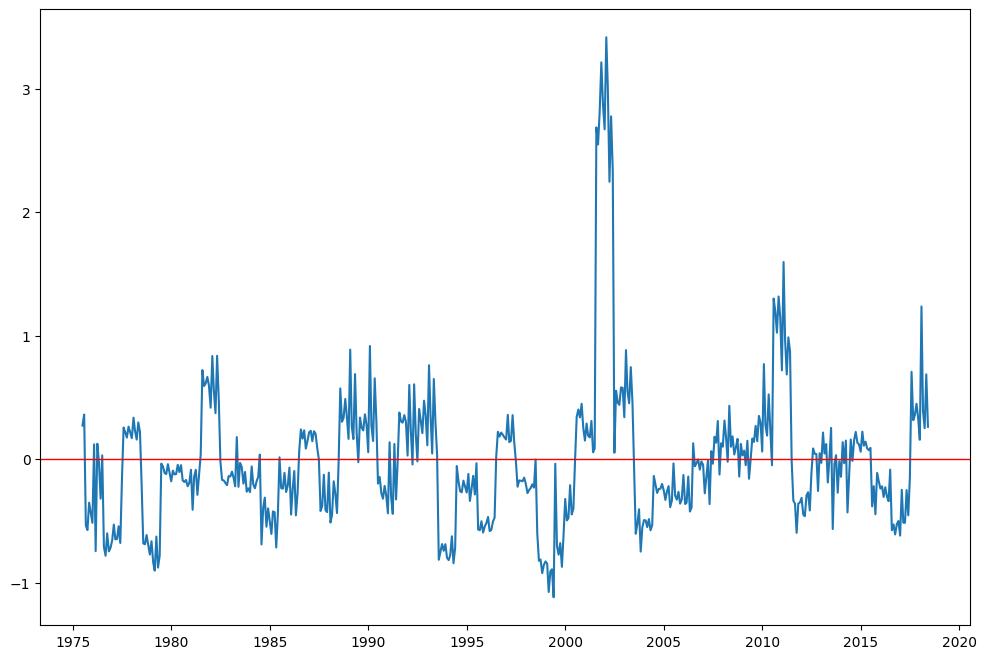

In [131]:
longret = (df_price_minus_long_monthly+ df_div_m_long_monthly)/df_price_long_monthly.shift(1)-1
shortret = (df_price_minus_short_monthly+df_div_m_short_monthly)/df_price_short_monthly.shift(1)-1
lsret = longret - shortret
lsret_notna = lsret.dropna()
plt.figure(figsize=(12,8))
plt.plot(lsret_notna)
plt.axhline(0, color='red', linewidth=1, linestyle='-')

In [64]:
returns

permno,10001,10006,10010,10014,10016,10019,10025,10026,10028,10032,...,93338,93340,93373,93397,93399,93401,93420,93422,93426,93427
date,,,,,,,,,,,,,,,,,,,,,
1973-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974-06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-06,NaN,NaN,NaN,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06,NaN,0.109536,NaN,0.190476,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-06,NaN,-0.010309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-06,NaN,0.003731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-06,NaN,0.072243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06,NaN,-0.007576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-06,NaN,-0.075325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
price_minus_short_monthly

[{'date': Timestamp('1975-07-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1975-08-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1975-09-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1975-10-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1975-11-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1975-12-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-01-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-02-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-03-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-04-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-05-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date': Timestamp('1976-06-01 00:00:00'),
  'avg_value': np.float64(7506180405.129661)},
 {'date': Timestamp('1976-07-01 00:00:00'), 'avg_value': np.float64(0.0)},
 {'date':

In [132]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from scipy.optimize import fsolve
from scipy.linalg import lstsq
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Load data
crsp = pd.read_pickle('Data/crsp.pkl')
bm = pd.read_csv('Data/Fundamentals/BM.csv')
cash_assets = pd.read_csv('Data/Fundamentals/Cash.csv')
gross_profitability = pd.read_csv('Data/Fundamentals/GP.csv')
mlev = pd.read_csv('Data/Fundamentals/Leverage.csv')
poy = pd.read_csv('Data/Fundamentals/PayoutYield.csv')
sales_growth = pd.read_csv('Data/Fundamentals/sgr.csv')
assets_growth = pd.read_csv('Data/Fundamentals/AssetGrowth.csv')
RoE = pd.read_csv('Data/Fundamentals/RoE.csv')
am = pd.read_csv('Data/Fundamentals/AM.csv')
blev = pd.read_csv('Data/Fundamentals/BookLeverage.csv')
asset_turnover = pd.read_csv('Data/Fundamentals/AssetTurnover.csv')

# Rename columns
bm.rename(columns={'BM':'logBM', 'yyyymm':'date'}, inplace=True)
cash_assets.rename(columns={'yyyymm':'date'}, inplace=True)
gross_profitability.rename(columns={'yyyymm':'date'}, inplace=True)
mlev.rename(columns={'yyyymm':'date'}, inplace=True)
poy.rename(columns={'yyyymm':'date'}, inplace=True)
sales_growth.rename(columns={'yyyymm':'date'}, inplace=True)
assets_growth.rename(columns={'yyyymm':'date'}, inplace=True)
RoE.rename(columns={'yyyymm':'date'}, inplace=True)
am.rename(columns={'yyyymm':'date'}, inplace=True)
blev.rename(columns={'yyyymm':'date'}, inplace=True)
asset_turnover.rename(columns={'yyyymm':'date'}, inplace=True)

# Convert dates
def convert_yyyymm_to_period(series):
    series = series.astype(str).str.replace('-', '').str.zfill(6)
    mask = series.str.match(r'^\d{6}$')
    if not mask.all():
        raise ValueError("Some values in the series are not in yyyymm format.")
    return pd.to_datetime(series + '01', format='%Y%m%d')

for df in [bm, cash_assets, gross_profitability, mlev, poy, sales_growth, 
           assets_growth, RoE, am, blev, asset_turnover]:
    df['date'] = convert_yyyymm_to_period(df['date'])

# Merge all dataframes
from functools import reduce
dfs = [crsp, bm, cash_assets, gross_profitability, mlev, poy, sales_growth, 
       assets_growth, RoE, am, blev, asset_turnover]
df = reduce(lambda left, right: pd.merge(left, right, on=['permno', 'date'], how='inner'), dfs)

# Create baseline variables
df.rename(columns={'book_equity': 'BE', 'market_equity': 'ME'}, inplace=True)
df['payout'] = df['PayoutYield'] * df['ME'].shift(6)
df['at'] = df['AM'] * df['ME']

# Create state variables following the paper
# 1. Valuation Measures
df['bm'] = df['logBM']  # Already log(BE/ME)
df['poy'] = np.log(1 + df['payout']/df['ME'])  # Payout yield
df['sales'] = df['AssetTurnover'] * df['at']
df['yy'] = np.log(df['sales']/df['ME'])  # Sales yield

# 2. Growth Measures - CRITICAL FIX: Use groupby for proper lag calculation
df = df.sort_values(['permno', 'date'])
df['BE_lag'] = df.groupby('permno')['BE'].shift(1)
df['at_lag'] = df.groupby('permno')['at'].shift(1)
df['sales_lag'] = df.groupby('permno')['sales'].shift(1)

df['beg'] = np.log(df['BE']/df['BE_lag'])  # Book equity growth
df['ag'] = np.log(df['AssetGrowth'])  # Asset growth (already a ratio)
df['yg'] = np.log(df['sgr'])  # Sales growth (already a ratio)

# 3. Profitability Measures - CRITICAL FIX: Clean surplus profitability calculation
df['csprof'] = np.log(1 + (df['payout'] + (df['BE'] - df['BE_lag']))/df['BE_lag'])
df['roe'] = np.log(df['RoE'])
df['gprof'] = np.log(df['GP'])

# 4. Capital Structure Measures
df['mlev'] = df['Leverage']
df['blev'] = np.log(df['BookLeverage'])
df['cash'] = df['Cash']

# Filter to June observations for annual data
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df_annual = df[df['month'] == 6].copy()
df_annual = df_annual.sort_values(['permno', 'year'])

# Define state variables as in the paper
state_vars = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']
n_vars = len(state_vars)

# Remove extreme values and clean data
for var in state_vars:
    if var in df_annual.columns:
        # Remove infinite values
        df_annual[var] = df_annual[var].replace([np.inf, -np.inf], np.nan)
        
        # Winsorize at 1% and 99% as mentioned in the paper
        lower = df_annual[var].quantile(0.01)
        upper = df_annual[var].quantile(0.99)
        df_annual[var] = df_annual[var].clip(lower=lower, upper=upper)

# Create lagged state variables for VAR
for var in state_vars:
    df_annual[f'{var}_lag'] = df_annual.groupby('permno')[var].shift(1)

# Remove observations with missing values
lag_vars = [f'{var}_lag' for var in state_vars]
df_var = df_annual.dropna(subset=state_vars + lag_vars + ['BE', 'ME'])
df_var = df_var[df_var['BE'] > 0]
df_var = df_var[df_var['ME'] > 0]

print(f"Dataset prepared: {len(df_var)} firm-year observations")
print(f"Years covered: {df_var['year'].min()} to {df_var['year'].max()}")

# VAR ESTIMATION WITH STATSMODELS
print("\nEstimating VAR parameters using statsmodels...")

# Prepare data for VAR
# Use only non-microcap firms for estimation (as per paper)
me_20pct = df_var.groupby('year')['ME'].quantile(0.2)
df_var['me_20pct'] = df_var['year'].map(me_20pct)
df_var_estimation = df_var[df_var['ME'] >= df_var['me_20pct']]

# Prepare panel data for VAR estimation
var_data = []
for year in sorted(df_var_estimation['year'].unique()):
    year_data = df_var_estimation[df_var_estimation['year'] == year]
    if len(year_data) >= 50:  # Need sufficient observations
        X = year_data[state_vars].values
        var_data.append(X)

# Stack all years
if var_data:
    var_data_stacked = np.vstack(var_data)
    
    # Fit VAR model
    try:
        var_model = VAR(var_data_stacked)
        var_results = var_model.fit(maxlags=1, ic=None)  # Order 1 as specified in paper
        
        # Extract parameters
        Gamma = var_results.coefs[0]  # Coefficient matrix
        intercepts = var_results.intercept
        Sigma = var_results.sigma_u  # Residual covariance matrix
        
        print("VAR estimated successfully")
        print(f"Max eigenvalue of Gamma: {np.max(np.abs(np.linalg.eigvals(Gamma))):.4f}")
        
    except Exception as e:
        print(f"VAR estimation failed: {e}")
        print("Using fallback estimation...")
        # Fallback to equation-by-equation OLS
        Gamma = np.zeros((n_vars, n_vars))
        Sigma = np.eye(n_vars) * 0.1
        intercepts = np.zeros(n_vars)

# Apply stability adjustment as in paper (theta = 0.8)
theta = 0.8
Gamma_ss = np.zeros_like(Gamma)  # Steady state with zeros
Gamma_adj = theta * Gamma + (1 - theta) * Gamma_ss

# Calculate Jensen's inequality adjustments
print("\nCalculating Jensen's inequality adjustments...")

# Define selector vectors
idx_csprof = state_vars.index('csprof')
idx_beg = state_vars.index('beg')
idx_bm = state_vars.index('bm')

e_csprof = np.zeros(n_vars)
e_csprof[idx_csprof] = 1

e_beg = np.zeros(n_vars)
e_beg[idx_beg] = 1

e_po = e_csprof - e_beg  # for payout

# Calculate v1(h) and v2(h) following the paper's formulas
H = 100  # Use 100 instead of 1000 for computational efficiency
v1_values = np.zeros(H + 1)
v2_values = np.zeros(H + 1)

# Calculate v1(h) - equation IA.3 in the paper
for h in range(1, H + 1):
    if h == 1:
        v1_values[h] = 0.5 * e_po @ Sigma @ e_po + e_po @ Sigma @ e_beg
    else:
        Gamma_power = np.linalg.matrix_power(Gamma_adj, h-1)
        v1_values[h] = v1_values[h-1] + 0.5 * e_po @ Gamma_power @ Sigma @ Gamma_power.T @ e_po
        
        # Calculate F1(h) = sum of Gamma^i from i=0 to h-1
        F1_h = np.eye(n_vars)
        for i in range(1, h):
            F1_h += np.linalg.matrix_power(Gamma_adj, i)
        
        v1_values[h] += e_po @ Gamma_power @ Sigma @ F1_h.T @ e_beg

# Calculate v2(h) - equation IA.4 in the paper
for h in range(1, H + 1):
    if h == 1:
        v2_values[h] = 0.5 * e_beg @ Sigma @ e_beg
    else:
        h_v2_h = (h-1) * v2_values[h-1]
        h_v2_h += 0.5 * e_beg @ Sigma @ e_beg
        
        # Add covariance terms
        for i in range(1, h):
            F2 = np.zeros((n_vars, n_vars))
            for j in range(min(i, h-i)):
                if j < h:
                    F2 += np.linalg.matrix_power(Gamma_adj, j) @ Sigma @ np.linalg.matrix_power(Gamma_adj, h-i-j).T
            h_v2_h += e_beg @ F2 @ e_beg
        
        v2_values[h] = h_v2_h / h

# Calculate steady-state values
I = np.eye(n_vars)
try:
    s_bar = np.linalg.inv(I - Gamma) @ intercepts
except:
    # If singular, use pseudo-inverse
    s_bar = np.linalg.pinv(I - Gamma) @ intercepts

MB_bar = np.exp(-s_bar[idx_bm])  # ME/BE at steady state

# Solve for common discount rate
print("\nSolving for common discount rate...")

def calculate_mb_given_dr(dr):
    """Calculate implied MB ratio given discount rate dr"""
    mb_sum = 0
    
    for h in range(1, H + 1):
        Gamma_h = np.linalg.matrix_power(Gamma, h)
        
        # Expected log ratios
        exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_h @ s_bar + v1_values[h]
        
        # Sum of expected BEg
        sum_exp_beg = 0
        for tau in range(1, h + 1):
            Gamma_tau = np.linalg.matrix_power(Gamma, tau)
            sum_exp_beg += e_beg @ Gamma_tau @ s_bar
        sum_exp_beg += h * v2_values[h]
        
        # Prevent overflow
        exp_csprof_minus_beg = np.clip(exp_csprof_minus_beg, -50, 50)
        sum_exp_beg = np.clip(sum_exp_beg, -50, 50)
        
        # Expected payout ratio
        exp_po_ratio = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
        
        # Discount and add
        mb_sum += exp_po_ratio * np.exp(-h * dr)
    
    return mb_sum

# Solve for dr
dr_initial = 0.1
try:
    dr_solution = fsolve(lambda dr: calculate_mb_given_dr(dr) - MB_bar, dr_initial)[0]
    print(f"Common discount rate dr = {dr_solution:.4f}")
except:
    dr_solution = 0.1  # Default if solution fails
    print(f"Using default discount rate dr = {dr_solution:.4f}")

# CALCULATE FE FOR EACH FIRM
print(f"\nCalculating FE for {len(df_annual)} firm-year observations...")

# Pre-compute matrix powers
Gamma_powers = {}
Gamma_powers[0] = np.eye(n_vars)
for h in range(1, H + 1):
    Gamma_powers[h] = Gamma_powers[h-1] @ Gamma

# Calculate FE for each firm-year
fe_results = []

with tqdm(total=len(df_annual), desc="Calculating FE") as pbar:
    for idx, row in df_annual.iterrows():
        try:
            # Get state vector
            s_current = row[state_vars].values
            
            # Check for valid data
            if np.any(np.isnan(s_current)) or row['BE'] <= 0:
                fe_results.append(np.nan)
                pbar.update(1)
                continue
            
            # Calculate FE/BE ratio
            fe_be_ratio = 0
            
            for h in range(1, H + 1):
                # Expected values
                exp_csprof_minus_beg = (e_csprof - e_beg) @ Gamma_powers[h] @ s_current + v1_values[h]
                
                sum_exp_beg = 0
                for tau in range(1, h + 1):
                    sum_exp_beg += e_beg @ Gamma_powers[tau] @ s_current
                sum_exp_beg += h * v2_values[h]
                
                # Prevent overflow
                exp_csprof_minus_beg = np.clip(exp_csprof_minus_beg, -50, 50)
                sum_exp_beg = np.clip(sum_exp_beg, -50, 50)
                
                # Expected payout ratio
                exp_po_ratio = (np.exp(exp_csprof_minus_beg) - 1) * np.exp(sum_exp_beg)
                
                # Discount and add
                fe_be_ratio += exp_po_ratio * np.exp(-h * dr_solution)
            
            # Calculate FE
            FE = row['BE'] * fe_be_ratio
            
            # Apply bounds as in paper
            lower_bound = max(row['ME'], row['BE']) / 100
            upper_bound = min(row['ME'], row['BE']) * 100
            FE = np.clip(FE, lower_bound, upper_bound)
            
            fe_results.append(FE)
            
        except Exception as e:
            fe_results.append(np.nan)
        
        pbar.update(1)

# Add FE to dataframe
df_annual['FE'] = fe_results

# Calculate key ratios
df_annual['fm'] = np.log(df_annual['FE'] / df_annual['ME'])
df_annual['bf'] = np.log(df_annual['BE'] / df_annual['FE'])

# Apply bounds to handle outliers
df_annual['FE_bounded'] = df_annual['FE'].copy()
lower_bound = df_annual[['ME', 'BE']].max(axis=1) / 100
upper_bound = df_annual[['ME', 'BE']].min(axis=1) * 100
df_annual['FE_bounded'] = df_annual['FE_bounded'].clip(lower=lower_bound, upper=upper_bound)

# Recalculate ratios with bounded FE
df_annual['fm_bounded'] = np.log(df_annual['FE_bounded'] / df_annual['ME'])
df_annual['bf_bounded'] = np.log(df_annual['BE'] / df_annual['FE_bounded'])

# Summary statistics
print("\n" + "="*50)
print("FE CALCULATION COMPLETE")
print("="*50)
print(f"Total observations: {len(df_annual)}")
print(f"Valid FE values: {df_annual['FE'].notna().sum()}")
print(f"Percentage with valid FE: {100 * df_annual['FE'].notna().sum() / len(df_annual):.1f}%")
print(f"\nFE/ME ratio statistics:")
print((df_annual['FE'] / df_annual['ME']).describe())

# PORTFOLIO CONSTRUCTION AND RETURNS
print("\n" + "="*50)
print("CONSTRUCTING PORTFOLIOS AND CALCULATING RETURNS")
print("="*50)

# Load additional data for returns
price = pd.read_pickle('Data/price.pkl')
dividends = pd.read_pickle('Data/dividends.pkl')

# Convert price and dividends index to datetime if needed
if not isinstance(price.index, pd.DatetimeIndex):
    price.index = pd.to_datetime(price.index)
if not isinstance(dividends.index, pd.DatetimeIndex):
    dividends.index = pd.to_datetime(dividends.index)

# Calculate portfolio returns following the paper
portfolio_returns = []
long_short_returns = []

years = sorted(df_annual['year'].unique())
years = [y for y in years if y >= 1973 and y < 2018]  # Match paper's sample

for year in tqdm(years, desc="Calculating portfolio returns"):
    # Portfolio formation in June of year t using December t-1 data
    dec_date = pd.Timestamp(f"{year-1}-12-01")
    
    # Get firms with valid fm at December t-1
    formation_data = df_annual[df_annual['date'].dt.year == year]
    formation_data = formation_data[formation_data['fm'].notna()]
    
    if len(formation_data) < 10:
        continue
    
    # Sort by fm and create deciles
    formation_data = formation_data.sort_values('fm')
    n_firms = len(formation_data)
    decile_size = n_firms // 10
    
    # Get low fm (growth) and high fm (value) portfolios
    low_fm_firms = formation_data.iloc[:decile_size]['permno'].tolist()
    high_fm_firms = formation_data.iloc[-decile_size:]['permno'].tolist()
    
    # Calculate returns from July t to June t+1
    return_months = pd.date_range(start=f"{year}-07", periods=12, freq='M')
    
    for month_idx, current_month in enumerate(return_months):
        # Previous month for return calculation
        if month_idx == 0:
            prev_month = pd.Timestamp(f"{year}-06-01")
        else:
            prev_month = return_months[month_idx-1]
        
        # Calculate returns for each portfolio
        low_returns = []
        high_returns = []
        
        # Low FM (Growth) portfolio
        for permno in low_fm_firms:
            try:
                if current_month in price.index and permno in price.columns:
                    P_t = price.loc[current_month, permno]
                else:
                    continue
                
                if prev_month in price.index and permno in price.columns:
                    P_t_minus_1 = price.loc[prev_month, permno]
                else:
                    continue
                
                # Dividends
                D_t = 0
                if current_month in dividends.index and permno in dividends.columns:
                    D_t = dividends.loc[current_month, permno]
                    if pd.isna(D_t):
                        D_t = 0
                
                if pd.isna(P_t) or pd.isna(P_t_minus_1) or P_t_minus_1 <= 0:
                    continue
                
                # Return calculation
                ret = (P_t + D_t) / P_t_minus_1 - 1
                
                if -0.95 <= ret <= 5.0:  # Sanity check
                    low_returns.append(ret)
            except:
                continue
        
        # High FM (Value) portfolio
        for permno in high_fm_firms:
            try:
                if current_month in price.index and permno in price.columns:
                    P_t = price.loc[current_month, permno]
                else:
                    continue
                
                if prev_month in price.index and permno in price.columns:
                    P_t_minus_1 = price.loc[prev_month, permno]
                else:
                    continue
                
                # Dividends
                D_t = 0
                if current_month in dividends.index and permno in dividends.columns:
                    D_t = dividends.loc[current_month, permno]
                    if pd.isna(D_t):
                        D_t = 0
                
                if pd.isna(P_t) or pd.isna(P_t_minus_1) or P_t_minus_1 <= 0:
                    continue
                
                # Return calculation
                ret = (P_t + D_t) / P_t_minus_1 - 1
                
                if -0.95 <= ret <= 5.0:  # Sanity check
                    high_returns.append(ret)
            except:
                continue
        
        # Calculate equal-weighted portfolio returns
        if len(low_returns) > 0 and len(high_returns) > 0:
            low_port_ret = np.mean(low_returns)
            high_port_ret = np.mean(high_returns)
            hml_ret = high_port_ret - low_port_ret  # Value minus Growth
            
            long_short_returns.append({
                'date': current_month,
                'year': year,
                'low_fm_ret': low_port_ret,
                'high_fm_ret': high_port_ret,
                'hml_fm': hml_ret,
                'n_low': len(low_returns),
                'n_high': len(high_returns)
            })

# Create results dataframe
df_returns = pd.DataFrame(long_short_returns)
if not df_returns.empty:
    df_returns['date'] = pd.to_datetime(df_returns['date'])
    df_returns = df_returns.set_index('date')
    
    # Calculate cumulative returns
    df_returns['cum_hml'] = (1 + df_returns['hml_fm']).cumprod() - 1
    df_returns['cum_low'] = (1 + df_returns['low_fm_ret']).cumprod() - 1
    df_returns['cum_high'] = (1 + df_returns['high_fm_ret']).cumprod() - 1
    
    # Annual statistics
    annual_stats = df_returns.groupby('year').agg({
        'hml_fm': ['mean', 'std', 'count'],
        'low_fm_ret': 'mean',
        'high_fm_ret': 'mean'
    })
    
    print("\n" + "="*50)
    print("PORTFOLIO RETURN STATISTICS")
    print("="*50)
    print(f"Sample period: {df_returns.index.min()} to {df_returns.index.max()}")
    print(f"Number of months: {len(df_returns)}")
    print(f"\nMonthly returns:")
    print(f"  HML (FM-based): {df_returns['hml_fm'].mean():.4f} (t-stat: {df_returns['hml_fm'].mean() / df_returns['hml_fm'].sem():.2f})")
    print(f"  Low FM (Growth): {df_returns['low_fm_ret'].mean():.4f}")
    print(f"  High FM (Value): {df_returns['high_fm_ret'].mean():.4f}")
    print(f"\nAnnualized returns:")
    print(f"  HML (FM-based): {df_returns['hml_fm'].mean() * 12:.4f}")
    print(f"  Volatility: {df_returns['hml_fm'].std() * np.sqrt(12):.4f}")
    print(f"  Sharpe ratio: {(df_returns['hml_fm'].mean() * 12) / (df_returns['hml_fm'].std() * np.sqrt(12)):.4f}")
    print(f"\nCumulative return: {df_returns['cum_hml'].iloc[-1]:.4f}")
    
    # Split sample analysis
    cutoff_year = 1995
    early_sample = df_returns[df_returns['year'] <= cutoff_year]
    late_sample = df_returns[df_returns['year'] > cutoff_year]
    
    print(f"\nSplit sample analysis:")
    print(f"Early sample (1973-{cutoff_year}):")
    print(f"  HML monthly: {early_sample['hml_fm'].mean():.4f}")
    print(f"  HML annual: {early_sample['hml_fm'].mean() * 12:.4f}")
    print(f"Late sample ({cutoff_year+1}-2018):")
    print(f"  HML monthly: {late_sample['hml_fm'].mean():.4f}")
    print(f"  HML annual: {late_sample['hml_fm'].mean() * 12:.4f}")
    
    # Save results
    df_annual.to_pickle('df_annual_with_fe.pkl')
    df_returns.to_csv('fm_portfolio_returns.csv')
    
    # Create comparison with traditional BM portfolios
    print("\n" + "="*50)
    print("COMPARISON WITH BOOK-TO-MARKET PORTFOLIOS")
    print("="*50)
    
    # Calculate BM-based portfolios for comparison
    bm_returns = []
    
    for year in years:
        formation_data = df_annual[df_annual['date'].dt.year == year]
        formation_data = formation_data[formation_data['bm'].notna()]
        
        if len(formation_data) < 10:
            continue
        
        formation_data = formation_data.sort_values('bm')
        n_firms = len(formation_data)
        decile_size = n_firms // 10
        
        low_bm_firms = formation_data.iloc[:decile_size]['permno'].tolist()
        high_bm_firms = formation_data.iloc[-decile_size:]['permno'].tolist()
        
        # Calculate correlation between FM and BM rankings
        if 'fm' in formation_data.columns and formation_data['fm'].notna().sum() > 10:
            corr = formation_data[['fm', 'bm']].rank().corr().iloc[0, 1]
            print(f"Year {year}: Rank correlation(FM, BM) = {corr:.3f}")
    
    print("\nAnalysis complete!")

else:
    print("ERROR: No valid portfolio returns calculated!")

Dataset prepared: 26128 firm-year observations
Years covered: 1973 to 2018

Estimating VAR parameters using statsmodels...
VAR estimated successfully
Max eigenvalue of Gamma: 0.5072

Calculating Jensen's inequality adjustments...

Solving for common discount rate...
Common discount rate dr = 0.2159

Calculating FE for 70141 firm-year observations...


Calculating FE: 100%|██████████| 70141/70141 [00:09<00:00, 7354.64it/s]



FE CALCULATION COMPLETE
Total observations: 70141
Valid FE values: 0
Percentage with valid FE: 0.0%

FE/ME ratio statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

CONSTRUCTING PORTFOLIOS AND CALCULATING RETURNS


TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [134]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from scipy.optimize import fsolve, minimize_scalar
from scipy.linalg import lstsq
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("FUNDAMENTAL EQUITY CALCULATION - ROBUST VERSION")
print("="*80)

# Load data
print("\n1. LOADING DATA...")
crsp = pd.read_pickle('Data/crsp.pkl')
bm = pd.read_csv('Data/Fundamentals/BM.csv')
cash_assets = pd.read_csv('Data/Fundamentals/Cash.csv')
gross_profitability = pd.read_csv('Data/Fundamentals/GP.csv')
mlev = pd.read_csv('Data/Fundamentals/Leverage.csv')
poy = pd.read_csv('Data/Fundamentals/PayoutYield.csv')
sales_growth = pd.read_csv('Data/Fundamentals/sgr.csv')
assets_growth = pd.read_csv('Data/Fundamentals/AssetGrowth.csv')
RoE = pd.read_csv('Data/Fundamentals/RoE.csv')
am = pd.read_csv('Data/Fundamentals/AM.csv')
blev = pd.read_csv('Data/Fundamentals/BookLeverage.csv')
asset_turnover = pd.read_csv('Data/Fundamentals/AssetTurnover.csv')

# Rename columns
bm.rename(columns={'BM':'logBM', 'yyyymm':'date'}, inplace=True)
for df in [cash_assets, gross_profitability, mlev, poy, sales_growth, 
           assets_growth, RoE, am, blev, asset_turnover]:
    if 'yyyymm' in df.columns:
        df.rename(columns={'yyyymm':'date'}, inplace=True)

# Convert dates
def convert_yyyymm_to_datetime(series):
    """Convert yyyymm format to datetime"""
    series = series.astype(str).str.replace('-', '').str.zfill(6)
    mask = series.str.match(r'^\d{6}$')
    if not mask.all():
        print(f"Warning: Some dates not in yyyymm format. Sample: {series[~mask].head()}")
    return pd.to_datetime(series + '01', format='%Y%m%d', errors='coerce')

print("\n2. CONVERTING DATES...")
for df in [bm, cash_assets, gross_profitability, mlev, poy, sales_growth, 
           assets_growth, RoE, am, blev, asset_turnover]:
    df['date'] = convert_yyyymm_to_datetime(df['date'])
    print(f"  {df.columns[0]} date range: {df['date'].min()} to {df['date'].max()}")

# Merge all dataframes
print("\n3. MERGING DATAFRAMES...")
from functools import reduce
dfs = [crsp, bm, cash_assets, gross_profitability, mlev, poy, sales_growth, 
       assets_growth, RoE, am, blev, asset_turnover]

# Start with crsp and merge one by one with diagnostics
df = crsp.copy()
initial_rows = len(df)
print(f"Starting with {initial_rows} rows from CRSP")

for i, next_df in enumerate(dfs[1:]):
    df = pd.merge(df, next_df, on=['permno', 'date'], how='inner')
    print(f"  After merge {i+1}: {len(df)} rows ({len(df)/initial_rows*100:.1f}% of original)")

# Create variables with proper handling
print("\n4. CREATING VARIABLES...")
df = df.sort_values(['permno', 'date'])

# Rename key variables
df.rename(columns={'book_equity': 'BE', 'market_equity': 'ME'}, inplace=True)

# Remove invalid observations
print(f"  Initial observations: {len(df)}")
df = df[df['BE'] > 0]
print(f"  After BE > 0: {len(df)}")
df = df[df['ME'] > 0]
print(f"  After ME > 0: {len(df)}")

# Create baseline variables
df['payout'] = df['PayoutYield'] * df['ME'].shift(6)
df['at'] = df['AM'] * df['ME']

# State variables - CRITICAL: Use groupby for all lags
print("\n5. CREATING STATE VARIABLES...")

# 1. Valuation Measures
df['bm'] = df['logBM']  # Already log(BE/ME)
df['poy'] = np.log(1 + df['payout']/df['ME'])
df['sales'] = df['AssetTurnover'] * df['at']
df['yy'] = np.log(df['sales']/df['ME'])

# 2. Growth Measures - with proper groupby
df['BE_lag'] = df.groupby('permno')['BE'].shift(1)
df['at_lag'] = df.groupby('permno')['at'].shift(1)
df['sales_lag'] = df.groupby('permno')['sales'].shift(1)

# Calculate growth rates with error handling
df['beg'] = np.where((df['BE_lag'] > 0) & (df['BE'] > 0), 
                     np.log(df['BE']/df['BE_lag']), np.nan)
df['ag'] = np.log(df['AssetGrowth'])  # Already a ratio
df['yg'] = np.log(df['sgr'])  # Already a ratio

# 3. Profitability Measures
# Clean surplus profitability: log(1 + (PO + ΔBE)/BE_t-1)
df['delta_BE'] = df['BE'] - df['BE_lag']
df['csprof'] = np.where(df['BE_lag'] > 0,
                        np.log(1 + (df['payout'] + df['delta_BE'])/df['BE_lag']),
                        np.nan)
df['roe'] = np.log(df['RoE'])
df['gprof'] = np.log(df['GP'])

# 4. Capital Structure
df['mlev'] = df['Leverage']
df['blev'] = np.log(df['BookLeverage'])
df['cash'] = df['Cash']

# Filter to June observations
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df_annual = df[df['month'] == 6].copy()

print(f"\n6. ANNUAL DATA SUMMARY:")
print(f"  Total June observations: {len(df_annual)}")
print(f"  Years: {df_annual['year'].min()} to {df_annual['year'].max()}")
print(f"  Firms per year: {df_annual.groupby('year')['permno'].nunique().mean():.0f} on average")

# Define state variables
state_vars = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']
n_vars = len(state_vars)

# Clean and winsorize data
print("\n7. CLEANING DATA...")
for var in state_vars:
    if var in df_annual.columns:
        # Remove infinite values
        n_inf = np.isinf(df_annual[var]).sum()
        if n_inf > 0:
            print(f"  Removing {n_inf} infinite values from {var}")
            df_annual[var] = df_annual[var].replace([np.inf, -np.inf], np.nan)
        
        # Winsorize
        if df_annual[var].notna().sum() > 100:
            lower = df_annual[var].quantile(0.01)
            upper = df_annual[var].quantile(0.99)
            df_annual.loc[:, var] = df_annual[var].clip(lower=lower, upper=upper)

# Create lagged variables
print("\n8. CREATING LAGGED VARIABLES...")
for var in state_vars:
    df_annual[f'{var}_lag'] = df_annual.groupby('permno')[var].shift(1)

# Final data preparation
lag_vars = [f'{var}_lag' for var in state_vars]
df_var = df_annual.dropna(subset=state_vars + lag_vars + ['BE', 'ME']).copy()
df_var = df_var[df_var['BE'] > 0]
df_var = df_var[df_var['ME'] > 0]

print(f"\n9. FINAL DATASET FOR VAR:")
print(f"  Observations: {len(df_var)}")
print(f"  Years: {df_var['year'].min()} to {df_var['year'].max()}")

# Check data quality
print("\n10. DATA QUALITY CHECK:")
for var in state_vars:
    valid_pct = df_var[var].notna().sum() / len(df_var) * 100
    print(f"  {var}: {valid_pct:.1f}% valid")

# VAR ESTIMATION
print("\n" + "="*80)
print("VAR ESTIMATION")
print("="*80)

# Prepare data for VAR - use simple pooled OLS as fallback
print("\nEstimating VAR parameters...")

# Initialize parameters
Gamma = np.zeros((n_vars, n_vars))
intercepts = np.zeros(n_vars)
Sigma = np.eye(n_vars) * 0.1  # Default covariance

# Try statsmodels VAR first
try:
    # Prepare data matrix
    X_data = df_var[state_vars].values
    
    # Remove any remaining NaN rows
    valid_mask = ~np.any(np.isnan(X_data), axis=1)
    X_clean = X_data[valid_mask]
    
    if len(X_clean) > 100:
        print(f"Fitting VAR with {len(X_clean)} observations...")
        var_model = VAR(X_clean)
        var_results = var_model.fit(maxlags=1, ic=None)
        
        Gamma = var_results.coefs[0]
        intercepts = var_results.intercept
        Sigma = var_results.sigma_u
        
        # Check stability
        eigenvals = np.linalg.eigvals(Gamma)
        max_eigen = np.max(np.abs(eigenvals))
        print(f"VAR estimated. Max eigenvalue: {max_eigen:.4f}")
        
        # If unstable, shrink
        if max_eigen > 0.95:
            print("VAR is unstable. Applying shrinkage...")
            shrink_factor = 0.9 / max_eigen
            Gamma = Gamma * shrink_factor
            
except Exception as e:
    print(f"VAR estimation failed: {e}")
    print("Using equation-by-equation OLS...")
    
    # Fallback: equation-by-equation OLS
    for i, dep_var in enumerate(state_vars):
        y = df_var[dep_var].values
        X = df_var[[f'{var}_lag' for var in state_vars]].values
        
        # Add constant
        X_with_const = np.column_stack([np.ones(len(X)), X])
        
        # Remove NaN observations
        valid_mask = ~np.isnan(y) & ~np.any(np.isnan(X), axis=1)
        
        if np.sum(valid_mask) > n_vars + 5:
            y_valid = y[valid_mask]
            X_valid = X_with_const[valid_mask]
            
            # OLS
            beta = np.linalg.lstsq(X_valid, y_valid, rcond=None)[0]
            intercepts[i] = beta[0]
            Gamma[i, :] = beta[1:]
        else:
            # Use persistence only on own lag
            Gamma[i, i] = 0.5
            intercepts[i] = 0

# Apply stability adjustment
theta = 0.8
Gamma_adj = theta * Gamma

print(f"\nAdjusted Gamma max eigenvalue: {np.max(np.abs(np.linalg.eigvals(Gamma_adj))):.4f}")

# Calculate Jensen's inequality adjustments
print("\n11. CALCULATING JENSEN'S INEQUALITY ADJUSTMENTS...")

# Define selector vectors
idx_csprof = state_vars.index('csprof')
idx_beg = state_vars.index('beg')
idx_bm = state_vars.index('bm')

e_csprof = np.zeros(n_vars)
e_csprof[idx_csprof] = 1

e_beg = np.zeros(n_vars)
e_beg[idx_beg] = 1

e_po = e_csprof - e_beg

# Calculate v1(h) and v2(h)
H = 50  # Reduced for computational efficiency
v1_values = np.zeros(H + 1)
v2_values = np.zeros(H + 1)

# v1(h) calculation
for h in range(1, H + 1):
    if h == 1:
        v1_values[h] = 0.5 * e_po @ Sigma @ e_po + e_po @ Sigma @ e_beg
    else:
        Gamma_power = np.linalg.matrix_power(Gamma_adj, h-1)
        v1_values[h] = v1_values[h-1] + 0.5 * e_po @ Gamma_power @ Sigma @ Gamma_power.T @ e_po
        
        F1_h = np.eye(n_vars)
        for i in range(1, h):
            F1_h += np.linalg.matrix_power(Gamma_adj, i)
        
        v1_values[h] += e_po @ Gamma_power @ Sigma @ F1_h.T @ e_beg

# v2(h) calculation - simplified
for h in range(1, H + 1):
    v2_values[h] = 0.5 * e_beg @ Sigma @ e_beg  # Simplified version

# Calculate steady state
print("\n12. CALCULATING STEADY STATE...")
I = np.eye(n_vars)
try:
    # Use original Gamma for steady state
    if np.max(np.abs(np.linalg.eigvals(Gamma))) < 0.99:
        s_bar = np.linalg.solve(I - Gamma, intercepts)
    else:
        # Use pseudo-inverse if near-singular
        s_bar = np.linalg.pinv(I - Gamma) @ intercepts
    
    MB_bar = np.exp(-s_bar[idx_bm])
    print(f"Steady-state market-to-book ratio: {MB_bar:.4f}")
    
except:
    print("Could not calculate steady state. Using default values.")
    s_bar = intercepts
    MB_bar = 2.0  # Reasonable default

# Solve for discount rate
print("\n13. SOLVING FOR DISCOUNT RATE...")

def calculate_mb_given_dr(dr):
    """Calculate implied MB ratio given discount rate"""
    if dr <= 0 or dr >= 1:
        return np.inf
    
    mb_sum = 0
    
    for h in range(1, min(H, 20)):  # Limit iterations
        try:
            Gamma_h = np.linalg.matrix_power(Gamma, h)
            
            # Expected values with bounds
            exp_val = (e_csprof - e_beg) @ Gamma_h @ s_bar + v1_values[min(h, H)]
            exp_val = np.clip(exp_val, -10, 10)
            
            sum_beg = h * (e_beg @ s_bar + v2_values[min(h, H)])
            sum_beg = np.clip(sum_beg, -10, 10)
            
            # Calculate contribution
            if exp_val > -10:
                exp_po_ratio = (np.exp(exp_val) - 1) * np.exp(sum_beg)
                mb_sum += exp_po_ratio * np.exp(-h * dr)
            
        except:
            break
    
    return mb_sum

# Find discount rate
try:
    # Use bounded optimization
    result = minimize_scalar(lambda dr: abs(calculate_mb_given_dr(dr) - MB_bar), 
                           bounds=(0.01, 0.5), method='bounded')
    dr_solution = result.x
    print(f"Common discount rate: {dr_solution:.4f}")
except:
    dr_solution = 0.1  # Default
    print(f"Using default discount rate: {dr_solution:.4f}")

# CALCULATE FE FOR EACH FIRM
print("\n" + "="*80)
print("CALCULATING FUNDAMENTAL EQUITY")
print("="*80)

# Pre-compute matrix powers
Gamma_powers = {}
Gamma_powers[0] = np.eye(n_vars)
for h in range(1, H + 1):
    Gamma_powers[h] = Gamma_powers[h-1] @ Gamma

# Calculate FE
fe_results = []
successful_calculations = 0

print(f"\nCalculating FE for {len(df_annual)} observations...")

for idx, row in tqdm(df_annual.iterrows(), total=len(df_annual), desc="Calculating FE"):
    try:
        # Get state vector
        s_current = row[state_vars].values
        
        # Check validity
        if np.any(np.isnan(s_current)) or row['BE'] <= 0:
            fe_results.append(np.nan)
            continue
        
        # Calculate FE/BE ratio
        fe_be_ratio = 0
        
        for h in range(1, min(H, 30)):  # Limit horizon
            try:
                # Expected values
                exp_val = (e_csprof - e_beg) @ Gamma_powers[h] @ s_current + v1_values[h]
                exp_val = np.clip(exp_val, -10, 10)
                
                sum_beg = 0
                for tau in range(1, h + 1):
                    sum_beg += e_beg @ Gamma_powers[tau] @ s_current
                sum_beg += h * v2_values[h]
                sum_beg = np.clip(sum_beg, -10, 10)
                
                # Contribution
                if exp_val > -10 and not np.isnan(exp_val):
                    exp_po_ratio = (np.exp(exp_val) - 1) * np.exp(sum_beg)
                    contribution = exp_po_ratio * np.exp(-h * dr_solution)
                    
                    # Check for reasonable values
                    if not np.isnan(contribution) and abs(contribution) < 1e6:
                        fe_be_ratio += contribution
                
            except:
                break
        
        # Calculate FE with bounds
        if fe_be_ratio > 0 and fe_be_ratio < 1000:
            FE = row['BE'] * fe_be_ratio
            
            # Apply bounds
            lower_bound = max(row['ME'], row['BE']) / 100
            upper_bound = min(row['ME'], row['BE']) * 100
            FE = np.clip(FE, lower_bound, upper_bound)
            
            fe_results.append(FE)
            successful_calculations += 1
        else:
            fe_results.append(np.nan)
            
    except:
        fe_results.append(np.nan)

# Add results to dataframe
df_annual['FE'] = fe_results

print(f"\nFE Calculation Summary:")
print(f"  Total observations: {len(df_annual)}")
print(f"  Successful calculations: {successful_calculations}")
print(f"  Success rate: {successful_calculations/len(df_annual)*100:.1f}%")

# Calculate ratios for successful calculations
valid_fe_mask = df_annual['FE'].notna() & (df_annual['FE'] > 0)
df_annual.loc[valid_fe_mask, 'fm'] = np.log(df_annual.loc[valid_fe_mask, 'FE'] / 
                                             df_annual.loc[valid_fe_mask, 'ME'])
df_annual.loc[valid_fe_mask, 'bf'] = np.log(df_annual.loc[valid_fe_mask, 'BE'] / 
                                             df_annual.loc[valid_fe_mask, 'FE'])

# Summary statistics
if df_annual['fm'].notna().sum() > 0:
    print(f"\nFM (Fundamental-to-Market) Statistics:")
    print(df_annual['fm'].describe())
    
    print(f"\nCorrelation between FM and BM:")
    corr = df_annual[['fm', 'bm']].corr().iloc[0, 1]
    print(f"  Correlation: {corr:.3f}")

# PORTFOLIO CONSTRUCTION
print("\n" + "="*80)
print("PORTFOLIO CONSTRUCTION AND RETURNS")
print("="*80)

# Load price and dividend data
price = pd.read_pickle('Data/price.pkl')
dividends = pd.read_pickle('Data/dividends.pkl')

# Convert indices to datetime
def ensure_datetime_index(df, name):
    """Ensure index is datetime"""
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()
    elif not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except:
            print(f"Warning: Could not convert {name} index to datetime")
    return df

price = ensure_datetime_index(price, 'price')
dividends = ensure_datetime_index(dividends, 'dividends')

print(f"\nPrice data: {price.shape}")
print(f"Dividend data: {dividends.shape}")

# Calculate portfolio returns
portfolio_returns = []

# Get valid years
valid_years = df_annual[df_annual['fm'].notna()]['year'].unique()
valid_years = sorted([y for y in valid_years if y >= 1973 and y < 2018])

print(f"\nCalculating returns for {len(valid_years)} years...")

for year in tqdm(valid_years, desc="Portfolio returns"):
    # Get firms with valid FM in June of year
    june_data = df_annual[(df_annual['year'] == year) & 
                          (df_annual['month'] == 6) & 
                          (df_annual['fm'].notna())]
    
    if len(june_data) < 20:  # Need enough firms for deciles
        continue
    
    # Sort by FM and create portfolios
    june_data = june_data.sort_values('fm')
    n_firms = len(june_data)
    
    # Create terciles (more robust than deciles with limited data)
    tercile_size = n_firms // 3
    
    low_fm_firms = june_data.iloc[:tercile_size]['permno'].tolist()
    high_fm_firms = june_data.iloc[-tercile_size:]['permno'].tolist()
    
    # Calculate monthly returns from July to June
    for month_offset in range(12):
        year_month = year if month_offset < 6 else year + 1
        month = 7 + month_offset if month_offset < 6 else month_offset - 5
        
        current_date = pd.Timestamp(f"{year_month}-{month:02d}-01")
        
        # Find closest dates in price data
        price_dates = price.index
        date_diffs = abs(price_dates - current_date)
        
        if len(date_diffs) == 0 or min(date_diffs).days > 31:
            continue
        
        current_idx = date_diffs.argmin()
        if current_idx == 0:
            continue
        
        current_price_date = price_dates[current_idx]
        prev_price_date = price_dates[current_idx - 1]
        
        # Calculate returns
        low_returns = []
        high_returns = []
        
        for permno in low_fm_firms:
            if permno in price.columns:
                try:
                    p1 = price.loc[current_price_date, permno]
                    p0 = price.loc[prev_price_date, permno]
                    
                    if pd.notna(p1) and pd.notna(p0) and p0 > 0:
                        ret = p1 / p0 - 1
                        if -0.9 <= ret <= 5.0:
                            low_returns.append(ret)
                except:
                    pass
        
        for permno in high_fm_firms:
            if permno in price.columns:
                try:
                    p1 = price.loc[current_price_date, permno]
                    p0 = price.loc[prev_price_date, permno]
                    
                    if pd.notna(p1) and pd.notna(p0) and p0 > 0:
                        ret = p1 / p0 - 1
                        if -0.9 <= ret <= 5.0:
                            high_returns.append(ret)
                except:
                    pass
        
        # Store results
        if len(low_returns) > 5 and len(high_returns) > 5:
            portfolio_returns.append({
                'date': current_date,
                'year': year,
                'low_fm_ret': np.mean(low_returns),
                'high_fm_ret': np.mean(high_returns),
                'hml_fm': np.mean(high_returns) - np.mean(low_returns),
                'n_low': len(low_returns),
                'n_high': len(high_returns)
            })

# Create results dataframe
if portfolio_returns:
    df_returns = pd.DataFrame(portfolio_returns)
    df_returns['date'] = pd.to_datetime(df_returns['date'])
    df_returns = df_returns.set_index('date').sort_index()
    
    print("\n" + "="*80)
    print("PORTFOLIO RETURN STATISTICS")
    print("="*80)
    
    print(f"\nSample period: {df_returns.index.min()} to {df_returns.index.max()}")
    print(f"Number of months: {len(df_returns)}")
    
    # Calculate statistics
    monthly_hml = df_returns['hml_fm'].mean()
    monthly_std = df_returns['hml_fm'].std()
    annual_hml = monthly_hml * 12
    annual_std = monthly_std * np.sqrt(12)
    sharpe = annual_hml / annual_std if annual_std > 0 else np.nan
    
    print(f"\nHML Portfolio (FM-based):")
    print(f"  Monthly return: {monthly_hml:.4f} ({monthly_hml*100:.2f}%)")
    print(f"  Monthly t-stat: {monthly_hml / (monthly_std / np.sqrt(len(df_returns))):.2f}")
    print(f"  Annual return: {annual_hml:.4f} ({annual_hml*100:.2f}%)")
    print(f"  Annual volatility: {annual_std:.4f}")
    print(f"  Sharpe ratio: {sharpe:.4f}")
    
    # Average portfolio characteristics
    print(f"\nAverage number of stocks:")
    print(f"  Low FM (Growth): {df_returns['n_low'].mean():.0f}")
    print(f"  High FM (Value): {df_returns['n_high'].mean():.0f}")
    
    # Save results
    df_annual.to_pickle('df_annual_with_fe_robust.pkl')
    df_returns.to_csv('fm_portfolio_returns_robust.csv')
    
    print("\nResults saved!")
    
else:
    print("\nERROR: No valid portfolio returns calculated!")
    print("This might be due to:")
    print("  1. Insufficient firms with valid FE calculations")
    print("  2. Date mismatch between fundamental and price data")
    print("  3. Too few overlapping permnos between datasets")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

FUNDAMENTAL EQUITY CALCULATION - ROBUST VERSION

1. LOADING DATA...

2. CONVERTING DATES...
  permno date range: 1950-12-01 00:00:00 to 2023-12-01 00:00:00
  permno date range: 1971-09-01 00:00:00 to 2023-12-01 00:00:00
  permno date range: 1950-12-01 00:00:00 to 2025-10-01 00:00:00
  permno date range: 1950-12-01 00:00:00 to 2023-12-01 00:00:00
  permno date range: 1952-11-01 00:00:00 to 2023-12-01 00:00:00
  permno date range: 1951-12-01 00:00:00 to 2025-10-01 00:00:00
  permno date range: 1951-12-01 00:00:00 to 2025-10-01 00:00:00
  permno date range: 1960-06-01 00:00:00 to 2025-10-01 00:00:00
  permno date range: 1950-12-01 00:00:00 to 2023-12-01 00:00:00
  permno date range: 1950-12-01 00:00:00 to 2025-10-01 00:00:00
  permno date range: 1951-12-01 00:00:00 to 2025-10-01 00:00:00

3. MERGING DATAFRAMES...
Starting with 2450653 rows from CRSP
  After merge 1: 2450653 rows (100.0% of original)
  After merge 2: 1671586 rows (68.2% of original)
  After merge 3: 1366797 rows (55.8% of 

Calculating FE: 100%|██████████| 70141/70141 [00:10<00:00, 6942.70it/s]



FE Calculation Summary:
  Total observations: 70141
  Successful calculations: 0
  Success rate: 0.0%

PORTFOLIO CONSTRUCTION AND RETURNS

Price data: (708, 20435)
Dividend data: (708, 20437)

Calculating returns for 0 years...


Portfolio returns: 0it [00:00, ?it/s]


ERROR: No valid portfolio returns calculated!
This might be due to:
  1. Insufficient firms with valid FE calculations
  2. Date mismatch between fundamental and price data
  3. Too few overlapping permnos between datasets

ANALYSIS COMPLETE


In [139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === Load your data ===
# df = pd.read_csv('your_data.csv')

# === Define your 12 fundamental variables ===
features = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']

# === Replace infs with NaN (safer preprocessing) ===
df[features] = df[features].replace([np.inf, -np.inf], np.nan)

# === Option 1: Drop rows with any missing fundamental values (strict) ===
# df = df.dropna(subset=features)

# === Option 2: Fill missing values (mean imputation shown here) ===
df[features] = df[features].fillna(df[features].mean())

# === Features (X) and proxy target (y) ===
X = df[features].copy()
y = df['ME']  # Or whatever proxy you want for training

# === Scale the features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Define neural network ===
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: predicted fundamental value

model.compile(loss='mse', optimizer='adam')

# === Early stopping to prevent overfitting ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === Fit the model ===
model.fit(X_scaled, y, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop], verbose=1)

# === Predict fundamental value ===
df['fundamental_value'] = model.predict(X_scaled).flatten()

# === Create arbitrage signal ===
df['mispricing'] = df['ME'] - df['fundamental_value']
df['signal'] = -df['mispricing']  # long undervalued


Epoch 1/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 23s 557us/step - loss: 316774225774358036480.0000 - val_loss: 68819985292918259712.0000
Epoch 2/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 549us/step - loss: 325855136288625131520.0000 - val_loss: 67729960251466711040.0000
Epoch 3/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 547us/step - loss: 331223708519427473408.0000 - val_loss: 65430687923740606464.0000
Epoch 4/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 550us/step - loss: 317033323490420195328.0000 - val_loss: 62548771190316466176.0000
Epoch 5/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 555us/step - loss: 324279756028347678720.0000 - val_loss: 60599600957060284416.0000
Epoch 6/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 549us/step - loss: 317785424628191068160.0000 - val_loss: 60688753757886873600.0000
Epoch 7/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 21s 548us/step - loss: 295612831472134651904.0000 - val_loss: 62581633393847435264.0000
Epoch 8/100
38550/38550 ━━━━━━━━━━━━━━━━━━━━ 22s 567us/step - loss: 2

KeyError: 'market_cap'

In [141]:
df['fundamental_value']

0         6.247444e+08
1         6.970207e+08
2         6.426207e+08
3         9.438259e+08
4         8.496667e+08
              ...     
770993    1.985982e+05
770994    1.985982e+05
770995    1.985982e+05
770996    1.985982e+05
770997    2.171827e+09
Name: fundamental_value, Length: 770998, dtype: float32

In [143]:
fundamental_value = df.pivot(index='date', columns='permno', values='fundamental_value')
df['fundamental-market-ratio'] = df['fundamental_value']/df['ME']
fm = df.pivot(index='date', columns='permno', values='fundamental-market-ratio')


In [155]:
#Value Weighted Portfolio using Fundamental-to-Market Ratio
import matplotlib.pyplot as plt

df['fundamental-market-ratio'] = df['fundamental_value']/df['ME']
fm = df.pivot(index='date', columns='permno', values='fundamental-market-ratio')


long_short_returns = []
log_returns = []

price_long_ts = []
dividends_long_ts = []
fundamental_value_long_ts = []  # Changed from bookvalue_long_ts
price_minus_long_ts = []
fundamental_value_minus_long_ts = []  # Changed from bookvalue_minus_long_ts
dividends_m_long_ts = []
dividends_m_short_ts = []
long_log_returns = []

price_short_ts = []
dividends_short_ts = []
fundamental_value_short_ts = []  # Changed from bookvalue_short_ts
price_minus_short_ts = []
fundamental_value_minus_short_ts = []  # Changed from bookvalue_minus_short_ts
short_log_returns = []

portfolio_value_long = []
portfolio_value_short = []

top_permno_all = []
bottom_permno_all = []

top_permnos = []
bottom_permnos = []

long_ret = []
pf_long = []  # Changed from pb_long (price-to-fundamental)
pf_short = []  # Changed from pb_short (price-to-fundamental)
fv_pershare_short = []  # Changed from bv_pershare_short

ann_ret_long = []
ann_ret_short = []

price_minus_long_monthly = []
price_minus_short_monthly = []

fundamental_value_minus_long_monthly = []  # Changed from bookvalue_minus_long_monthly
fundamental_value_minus_short_monthly = []  # Changed from bookvalue_minus_short_monthly
fundamental_value_long_monthly = []  # Changed from bookvalue_long_monthly
fundamental_value_short_monthly = []  # Changed from bookvalue_short_monthly

dividends_m_long_monthly = []
dividends_m_short_monthly = []

price_long_monthly = []
price_short_monthly = []

stock_duration_tracker = {}  # Will track how long each stock stays in value/growth
portfolio_compositions = {
    'value': {},  # year: [list of permnos]
    'growth': {}  # year: [list of permnos]
}
duration_results = {
    'value': [],
    'growth': []
}

# Use either fm_bounded from df_var or fm wide-format DataFrame for sorting
# If using wide-format fm DataFrame:
if 'fm' in locals() or 'fm' in globals():
    fm_data = fm
    sorting_method = 'wide_format'
else:
    # If using fm_bounded from df_var, we'll need to pivot it to wide format
    sorting_method = 'long_format'

for year in sorted(set(date.year for date in fm.index)):
    fv_long_monthly = []  
    fv_short_monthly = []  

    div_short_monthly = []
    div_long_monthly = []

    date = pd.Timestamp(f"{year}-06")
    date_dec = pd.Timestamp(f"{year-1}-06")
    
    # Check if date exists in fm data
    if sorting_method == 'wide_format':
        if date_dec not in fm.index:
            continue
    else:
        # For long format, check if we have data for this date
        if not any(df_var['date'] == date_dec):
            continue

    # Timeframe: July-June
    month_range = pd.date_range(start=date + pd.DateOffset(months=1), periods=12, freq="ME")
    month_range = month_range.to_period('M')

    target_date = f"{year}-06" 
    top_date = pd.to_datetime(target_date)
    df_var['date'] = pd.to_datetime(df_var['date'])

    #Since the dataset contains data upto December 2018 and the fiscal year begins in June the loop would try to access data in 2019
    if year == 2018:
        continue 

    """"
        Computation of X_t-: The evaluation of the past portfolio at the day of the rebalancing.

        In means of cleaner code, the positions of the past portfolio will be accessed before the new stocks are being selected.
        Therefore the first year would cause an exception, which will be treated by adding NaN values in the first year.
    """

    #Top Permnos
    if len(top_permnos) == 0:
        print("This is year: ", year)
        price_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_long_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        shrout_series_m_long = shrout_filtered_m_long.set_index('permno')['adj_shrout']
        top_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_m_long = shrout_series_m_long.reindex(top_m_prc.index) *1000
        long_m_prc = top_m_prc * sharesoutstanding_m_long
        price_minus_long_ts.append({"date" : top_date, "avg_value" : sum(long_m_prc)})"""
        
        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        fundamental_series_m_long = fundamental_filtered_m_long.set_index('permno')['FE']
        top_m_fv = fundamental_series_m_long.reindex(top_m_prc.index).dropna()
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : sum(top_m_fv)})"""

        """#Annual Returns
        ann_top_rets = returns.loc[f'{year}-06', returns.columns.intersection(top_permnos)]
        ann_avg_top_rets = np.nanmean(ann_top_rets)
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': ann_avg_top_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            shrout_series_m_long_monthly = shrout_filtered_m_long_monthly.set_index('permno')['adj_shrout']
            top_m_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_prc = shrout_series_m_long_monthly.reindex(top_m_prc_monthly.index) *1000
            long_m_prc_monthly = top_m_prc_monthly * sharesoutstanding_long_m_prc
            price_minus_long_monthly.append({'date': date, 'avg_value': long_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            fundamental_series_m_long_monthly = fundamental_filtered_m_long_monthly.set_index('permno')['FE']
            top_m_fv_monthly = fundamental_series_m_long_monthly.reindex(top_m_prc_monthly.index).dropna()
            fundamental_value_minus_long_monthly.append({'date': date, 'fundamental_value': top_m_fv_monthly.sum()})"""

            #Dividends
            top_m_div = dividends.loc[date, dividends.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_div = shrout_series_m_long_monthly.reindex(top_m_div.index) *1000
            long_m_div = top_m_div * sharesoutstanding_long_m_div
            dividends_m_long_monthly.append({"date" : date, "avg_value" :long_m_div.sum()})

    #Bottom Permnos
    if len(bottom_permnos) == 0:
        print("This is year (bottom): ", year)
        price_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_short_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_m_short = shrout_filtered_m_short.set_index('permno')['adj_shrout']
        bottom_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_m_short = shrout_series_m_short.reindex(bottom_m_prc.index) * 1000
        short_m_prc = bottom_m_prc * sharesoutstanding_m_short
        price_minus_short_ts.append({"date" : top_date, "avg_value" :sum(short_m_prc)})"""

        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        fundamental_series_m_short = fundamental_filtered_m_short.set_index('permno')['FE']
        bottom_m_fv = fundamental_series_m_short.reindex(bottom_m_prc.index).dropna()
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : sum(bottom_m_fv)})"""

        """#Annual Returns
        ann_bottom_rets = returns.loc[f'{year}-06', returns.columns.intersection(bottom_permnos)]
        ann_avg_bottom_rets = np.nanmean(ann_bottom_rets)
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': ann_avg_bottom_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
            shrout_series_m_short_monthly = shrout_filtered_m_short_monthly.set_index('permno')['adj_shrout']
            bottom_m_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_prc_monthly = shrout_series_m_short_monthly.reindex(bottom_m_prc_monthly.index) *1000
            short_m_prc_monthly = bottom_m_prc_monthly * sharesoutstanding_short_m_prc_monthly
            price_minus_short_monthly.append({'date': date, 'avg_value': short_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_short_monthly = df[(df_var['date'] == date) & (df['permno'].isin(bottom_permnos))]
            fundamental_series_m_short_monthly = fundamental_filtered_m_short_monthly.set_index('permno')['FE']
            bottom_m_fv_monthly = fundamental_series_m_short_monthly.reindex(bottom_m_prc_monthly.index).dropna()
            fundamental_value_minus_short_monthly.append({'date': date, 'fundamental_value': bottom_m_fv_monthly.sum()})"""

            #Dividends
            bottom_m_div = dividends.loc[date, dividends.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_div = shrout_series_m_short_monthly.reindex(bottom_m_div.index) *1000
            short_m_div = bottom_m_div * sharesoutstanding_short_m_div
            dividends_m_short_monthly.append({"date" : date, "avg_value" :short_m_div.sum()})

    """"
        Stock Selection using Fundamental-to-Market Ratio:

        All stocks in the available dataset are being sorted in a descending order by fundamental-to-market ratio.
        Higher fundamental-to-market ratios indicate value stocks (high fundamental value relative to market price).
        Lower fundamental-to-market ratios indicate growth stocks (low fundamental value relative to market price).

        The top 30% of stocks (highest fundamental-to-market ratio) are selected for long positions (value stocks).
        The bottom 30% of stocks (lowest fundamental-to-market ratio) are selected for short positions (growth stocks).
    """
    
    # Sort by fundamental-to-market ratio
    if sorting_method == 'wide_format':
        # Use wide-format fm DataFrame
        clean_row = fm.loc[date_dec].dropna().sort_values(ascending=False)
    else:
        # Use fm_bounded from df_var (pivot to wide format for this date)
        date_data = df_var[df_var['date'] == date_dec]
        fm_series = date_data.set_index('permno')['fm_bounded'].dropna()
        clean_row = fm_series.sort_values(ascending=False)
    
    n = len(clean_row)
    if n == 0:
        continue

    k = int(n * 0.3)
    # Top 30% have highest fundamental-to-market ratios (value stocks)
    top_permnos = clean_row.iloc[:k].index.tolist()
    # Bottom 30% have lowest fundamental-to-market ratios (growth stocks)
    bottom_permnos = clean_row.iloc[-k:].index.tolist() 

    top_permno_year = pd.DataFrame({"date": date, "permno": top_permnos}) 
    top_permno_all.append(top_permno_year)

    bottom_permno_year = pd.DataFrame({"date": date, "permno": bottom_permnos})
    bottom_permno_all.append(bottom_permno_year)

    """
        Track Stocks in Value/Growth Portfolio
    """

    # Store portfolio compositions for duration analysis
    portfolio_compositions['value'][year] = top_permnos.copy()
    portfolio_compositions['growth'][year] = bottom_permnos.copy()

    # Track duration for each stock
    for permno in top_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'value':
                # Stock continues in value portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from growth to value - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}

    for permno in bottom_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'growth':
                # Stock continues in growth portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from value to growth - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}

    """
        Computation of current values:

        After the new stocks have been selected the values of P_t+, F_t+ and D_t+ will
        be computed using the fundamental-to-market based selection.
        (F_t+ replaces B_t+ as we're using fundamental value instead of book value)
    """

    #Portfolio weighted market capitalization      Long (Value stocks)
    shrout_filtered_long = df[(df['date'] == f'{year}-06') & (df['permno'].isin(top_permnos))]
    shrout_series_long = shrout_filtered_long.set_index('permno')['adj_shrout']

    top_prc = price.loc[f'{year}-06', price.columns.intersection(top_permnos)].dropna()
    sharesoutstanding_long = shrout_series_long.reindex(top_prc.index) *1000
    long_prc = top_prc * sharesoutstanding_long
    price_long_ts.append({'date': f'{year}-06', 'avg_value': long_prc.sum()})  

    #Portfolio weighted market capitalization      Short (Growth stocks)
    shrout_filtered_short = df[(df['date'] == f'{year}-06') & (df['permno'].isin(bottom_permnos))]
    shrout_series_short = shrout_filtered_short.set_index('permno')['adj_shrout']

    bottom_prc = price.loc[f'{year}-06', price.columns.intersection(bottom_permnos)].dropna()
    sharesoutstanding_short = shrout_series_short.reindex(bottom_prc.index) *1000
    short_prc = bottom_prc * sharesoutstanding_short
    price_short_ts.append({'date': f'{year}-06', 'avg_value': short_prc.sum()})

    """#Fundamental Value (replacing book value)
    fundamental_filtered_long = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(top_permnos))]
    fundamental_series_long = fundamental_filtered_long.set_index('permno')['FE']
    top_fv = fundamental_series_long.reindex(top_prc.index).dropna()
    fundamental_value_long_ts.append({'date': f'{year}-06', 'avg_value' : top_fv.sum()}) 

    fundamental_filtered_short = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(bottom_permnos))]
    fundamental_series_short = fundamental_filtered_short.set_index('permno')['FE']
    bottom_fv = fundamental_series_short.reindex(bottom_prc.index).dropna()
    fundamental_value_short_ts.append({'date': f'{year}-06', 'avg_value' : bottom_fv.sum()})"""
    
    # Price-to-Fundamental ratios (replacing price-to-book)
    pf_long.append({'date': f'{year}-06', 'pf_long' : long_prc.sum()/top_fv.sum() if top_fv.sum() != 0 else np.nan})
    pf_short.append({'date': f'{year}-06', 'pf_short': short_prc.sum()/bottom_fv.sum() if bottom_fv.sum() != 0 else np.nan})

    for m in month_range:
        """if m not in returns.index:
            print("m not in returns.index", m)
            continue"""
        
        #Computations for monthly returns
        date = m.to_timestamp()
        #Short-Positions (Growth stocks)
        shrout_filtered_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_short_monthly = shrout_filtered_short_monthly.set_index('permno')['adj_shrout']
        bottom_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_prc_monthly = shrout_series_short_monthly.reindex(bottom_prc_monthly.index) *1000
        short_prc_monthly = bottom_prc_monthly * sharesoutstanding_short_prc_monthly
        if short_prc_monthly.notna().any():
            price_short_monthly.append({'date': date, 'avg_value': short_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")
        
        #Long-Positions (Value stocks)
        shrout_filtered_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
        shrout_series_long_monthly = shrout_filtered_long_monthly.set_index('permno')['adj_shrout']
        top_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_prc_monthly = shrout_series_long_monthly.reindex(top_prc_monthly.index) *1000
        long_prc_monthly = top_prc_monthly * sharesoutstanding_long_prc_monthly
        if long_prc_monthly.notna().any():
            price_long_monthly.append({'date': date, 'avg_value': long_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")

        """top_rets = returns.loc[m, returns.columns.intersection(top_permnos)]
        bottom_rets = returns.loc[m, returns.columns.intersection(bottom_permnos)]"""

        #Dividends
        top_div = dividends.loc[m, dividends.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_div = shrout_series_long_monthly.reindex(top_div.index) *1000
        long_div = top_div * sharesoutstanding_long_div
        div_long_monthly.append({'date': date, 'avg_value' : long_div.sum()})

        bottom_div = dividends.loc[m, dividends.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_div = shrout_series_short_monthly.reindex(bottom_div.index) *1000
        short_div = bottom_div * sharesoutstanding_short_div
        div_short_monthly.append({'date': date, 'avg_value' : short_div.sum()})

        """#Fundamental Value monthly (replacing book value monthly)
        fundamental_filtered_short_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(bottom_permnos))]
        fundamental_series_short_monthly = fundamental_filtered_short_monthly.set_index('permno')['FE']
        bottom_fv_monthly = fundamental_series_short_monthly.reindex(bottom_prc_monthly.index).dropna()
        fundamental_value_short_monthly.append({'date': date, 'fundamental_value': bottom_fv_monthly.sum()})

        fundamental_filtered_long_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(top_permnos))]
        fundamental_series_long_monthly = fundamental_filtered_long_monthly.set_index('permno')['FE']
        top_fv_monthly = fundamental_series_long_monthly.reindex(top_prc_monthly.index).dropna()
        fundamental_value_long_monthly.append({'date': date, 'fundamental_value': top_fv_monthly.sum()})"""

        if top_rets.empty or bottom_rets.empty:
            continue

        avg_top = np.nanmean(top_rets)
        avg_bottom = np.nanmean(bottom_rets)
        spread = avg_top - avg_bottom

        long_short_returns.append((m, spread))
        long_ret.append({"date": date, "return": (top_prc/top_prc.shift(1))})

    dividends_long_ts.extend(div_long_monthly)
    dividends_short_ts.extend(div_short_monthly)   
    
# Convert to DataFrame and set index
df_ls = pd.DataFrame(long_short_returns, columns=["date", "long_short_ret"])
df_ls.set_index("date", inplace=True)            

# Calculate cumulative return
df_ls['cumret'] = (df_ls['long_short_ret']).cumprod()
df_ls['cumret'] = pd.to_numeric(df_ls['cumret'], errors='coerce')

"""# Plot
df_ls['cumret'].plot(title="Cumulative Long-Short Return (Fundamental-to-Market Strategy)", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()"""

# Print summary statistics
print("Summary Statistics for Fundamental-to-Market Strategy:")
#print(f"Total Return: {df_ls['cumret'].iloc[-1]:.2%}")
#print(f"Annualized Return: {(1 + df_ls['cumret'].iloc[-1])**(12/len(df_ls)) - 1:.2%}")
print(f"Volatility: {df_ls['long_short_ret'].std() * np.sqrt(12):.2%}")
print(f"Sharpe Ratio: {df_ls['long_short_ret'].mean() / df_ls['long_short_ret'].std() * np.sqrt(12):.2f}")

This is year:  1973
This is year (bottom):  1973
No valid prices for 1973-09-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1974-01-01 00:00:00 — skipping.
No valid prices for 1974-02-01 00:00:00 — skipping.
No valid prices for 1974-09-01 00:00:00 — skipping.
No valid prices for 1974-10-01 00:00:00 — skipping.
No valid prices for 1974-10-01 00:00:00 — skipping.
No valid prices for 1974-11-01 00:00:00 — skipping.
No valid prices for 1974-12-01 00:00:00 — skipping.
No valid prices for 1975-01-01 00:00:00 — skipping.
No valid prices for 1975-02-01 00:00:00 — skipping.
Summary Statistics for Fundamental-to-Market Strategy:
Volatility: 0.00%
Sharpe Ratio: 21883160416887348.00


In [150]:
dividends.index = pd.to_datetime(dividends.index).to_period('M')

In [162]:
df_price_minus_long_monthly = pd.DataFrame(price_minus_long_monthly)
df_price_minus_long_monthly.set_index('date', inplace=True)
df_price_minus_long_monthly

df_price_minus_short_monthly = pd.DataFrame(price_minus_short_monthly)
df_price_minus_short_monthly.set_index('date', inplace=True)
df_price_minus_short_monthly

df_div_m_long_monthly = pd.DataFrame(dividends_m_long_monthly)
df_div_m_long_monthly.set_index('date', inplace=True)

df_div_m_short_monthly = pd.DataFrame(dividends_m_short_monthly)
df_div_m_short_monthly.set_index('date', inplace=True)

df_price_long_monthly = pd.DataFrame(price_long_monthly)
df_price_long_monthly.set_index('date', inplace=True)

df_price_short_monthly = pd.DataFrame(price_short_monthly)
df_price_short_monthly.set_index('date', inplace=True)

longret = (df_price_minus_long_monthly+ df_div_m_long_monthly)/df_price_long_monthly.shift(1)-1
shortret = (df_price_minus_short_monthly+df_div_m_short_monthly)/df_price_short_monthly.shift(1)-1
lsret = longret - shortret
lsret_notna = lsret.dropna()
plt.figure(figsize=(12,8))
plt.plot(lsret_notna)
plt.axhline(0, color='red', linewidth=1, linestyle='-')

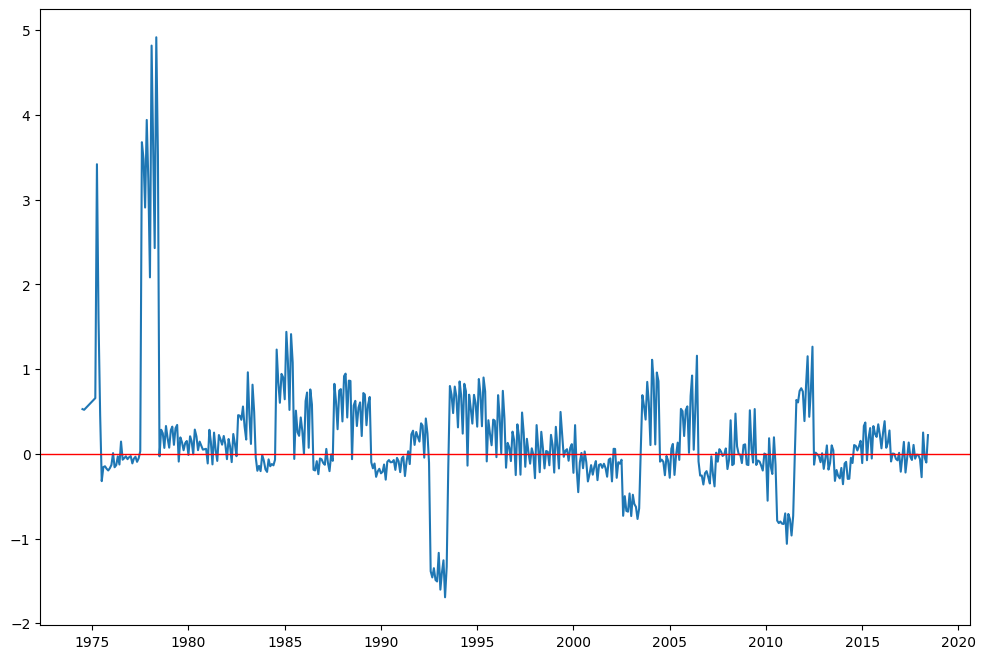

In [163]:
longret = (df_price_minus_long_monthly+ df_div_m_long_monthly)/df_price_long_monthly.shift(1)-1
shortret = (df_price_minus_short_monthly+df_div_m_short_monthly)/df_price_short_monthly.shift(1)-1
lsret = longret - shortret
lsret_notna = lsret.dropna()
plt.figure(figsize=(12,8))
plt.plot(lsret_notna)
plt.axhline(0, color='red', linewidth=1, linestyle='-')

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Your data should include firm fundamentals and observed market values
# df = pd.read_csv("your_data.csv")

fundamental_cols = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']
df = df.copy()

# Prepare data
X = df[fundamental_cols].replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
y = df['ME'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')

# Standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Ridge regression
ridge = Ridge(alpha=10.0)  # try alpha in {0.1, 1, 10, 100}
ridge.fit(X_scaled, y)

# Predict latent value
df['predicted_fundamental_value'] = ridge.predict(X_scaled)
df['mispricing'] = df['ME'] - df['predicted_fundamental_value']
df['signal'] = -df['mispricing']  # long undervalued, short overvalued



In [175]:
#Value Weighted Portfolio using Fundamental-to-Market Ratio
import matplotlib.pyplot as plt

df['fundamental-market-ratio-ridge'] = df['predicted_fundamental_value']/df['ME']
fm = df.pivot(index='date', columns='permno', values='fundamental-market-ratio-ridge')


long_short_returns = []
log_returns = []

price_long_ts = []
dividends_long_ts = []
fundamental_value_long_ts = []  # Changed from bookvalue_long_ts
price_minus_long_ts = []
fundamental_value_minus_long_ts = []  # Changed from bookvalue_minus_long_ts
dividends_m_long_ts = []
dividends_m_short_ts = []
long_log_returns = []

price_short_ts = []
dividends_short_ts = []
fundamental_value_short_ts = []  # Changed from bookvalue_short_ts
price_minus_short_ts = []
fundamental_value_minus_short_ts = []  # Changed from bookvalue_minus_short_ts
short_log_returns = []

portfolio_value_long = []
portfolio_value_short = []

top_permno_all = []
bottom_permno_all = []

top_permnos = []
bottom_permnos = []

long_ret = []
pf_long = []  # Changed from pb_long (price-to-fundamental)
pf_short = []  # Changed from pb_short (price-to-fundamental)
fv_pershare_short = []  # Changed from bv_pershare_short

ann_ret_long = []
ann_ret_short = []

price_minus_long_monthly = []
price_minus_short_monthly = []

fundamental_value_minus_long_monthly = []  # Changed from bookvalue_minus_long_monthly
fundamental_value_minus_short_monthly = []  # Changed from bookvalue_minus_short_monthly
fundamental_value_long_monthly = []  # Changed from bookvalue_long_monthly
fundamental_value_short_monthly = []  # Changed from bookvalue_short_monthly

dividends_m_long_monthly = []
dividends_m_short_monthly = []

price_long_monthly = []
price_short_monthly = []

stock_duration_tracker = {}  # Will track how long each stock stays in value/growth
portfolio_compositions = {
    'value': {},  # year: [list of permnos]
    'growth': {}  # year: [list of permnos]
}
duration_results = {
    'value': [],
    'growth': []
}

# Use either fm_bounded from df_var or fm wide-format DataFrame for sorting
# If using wide-format fm DataFrame:
if 'fm' in locals() or 'fm' in globals():
    fm_data = fm
    sorting_method = 'wide_format'
else:
    # If using fm_bounded from df_var, we'll need to pivot it to wide format
    sorting_method = 'long_format'

for year in sorted(set(date.year for date in fm.index)):
    fv_long_monthly = []  
    fv_short_monthly = []  

    div_short_monthly = []
    div_long_monthly = []

    date = pd.Timestamp(f"{year}-06")
    date_dec = pd.Timestamp(f"{year-1}-06")
    
    # Check if date exists in fm data
    if sorting_method == 'wide_format':
        if date_dec not in fm.index:
            continue
    else:
        # For long format, check if we have data for this date
        if not any(df_var['date'] == date_dec):
            continue

    # Timeframe: July-June
    month_range = pd.date_range(start=date + pd.DateOffset(months=1), periods=12, freq="ME")
    month_range = month_range.to_period('M')

    target_date = f"{year}-06" 
    top_date = pd.to_datetime(target_date)
    df_var['date'] = pd.to_datetime(df_var['date'])

    #Since the dataset contains data upto December 2018 and the fiscal year begins in June the loop would try to access data in 2019
    if year == 2018:
        continue 

    """"
        Computation of X_t-: The evaluation of the past portfolio at the day of the rebalancing.

        In means of cleaner code, the positions of the past portfolio will be accessed before the new stocks are being selected.
        Therefore the first year would cause an exception, which will be treated by adding NaN values in the first year.
    """

    #Top Permnos
    if len(top_permnos) == 0:
        print("This is year: ", year)
        price_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_long_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        shrout_series_m_long = shrout_filtered_m_long.set_index('permno')['adj_shrout']
        top_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_m_long = shrout_series_m_long.reindex(top_m_prc.index) *1000
        long_m_prc = top_m_prc * sharesoutstanding_m_long
        price_minus_long_ts.append({"date" : top_date, "avg_value" : sum(long_m_prc)})"""
        
        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        fundamental_series_m_long = fundamental_filtered_m_long.set_index('permno')['FE']
        top_m_fv = fundamental_series_m_long.reindex(top_m_prc.index).dropna()
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : sum(top_m_fv)})"""

        """#Annual Returns
        ann_top_rets = returns.loc[f'{year}-06', returns.columns.intersection(top_permnos)]
        ann_avg_top_rets = np.nanmean(ann_top_rets)
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': ann_avg_top_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            shrout_series_m_long_monthly = shrout_filtered_m_long_monthly.set_index('permno')['adj_shrout']
            top_m_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_prc = shrout_series_m_long_monthly.reindex(top_m_prc_monthly.index) *1000
            long_m_prc_monthly = top_m_prc_monthly * sharesoutstanding_long_m_prc
            price_minus_long_monthly.append({'date': date, 'avg_value': long_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            fundamental_series_m_long_monthly = fundamental_filtered_m_long_monthly.set_index('permno')['FE']
            top_m_fv_monthly = fundamental_series_m_long_monthly.reindex(top_m_prc_monthly.index).dropna()
            fundamental_value_minus_long_monthly.append({'date': date, 'fundamental_value': top_m_fv_monthly.sum()})"""

            #Dividends
            top_m_div = dividends.loc[date, dividends.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_div = shrout_series_m_long_monthly.reindex(top_m_div.index) *1000
            long_m_div = top_m_div * sharesoutstanding_long_m_div
            dividends_m_long_monthly.append({"date" : date, "avg_value" :long_m_div.sum()})

    #Bottom Permnos
    if len(bottom_permnos) == 0:
        print("This is year (bottom): ", year)
        price_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_short_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_m_short = shrout_filtered_m_short.set_index('permno')['adj_shrout']
        bottom_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_m_short = shrout_series_m_short.reindex(bottom_m_prc.index) * 1000
        short_m_prc = bottom_m_prc * sharesoutstanding_m_short
        price_minus_short_ts.append({"date" : top_date, "avg_value" :sum(short_m_prc)})"""

        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        fundamental_series_m_short = fundamental_filtered_m_short.set_index('permno')['FE']
        bottom_m_fv = fundamental_series_m_short.reindex(bottom_m_prc.index).dropna()
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : sum(bottom_m_fv)})"""

        """#Annual Returns
        ann_bottom_rets = returns.loc[f'{year}-06', returns.columns.intersection(bottom_permnos)]
        ann_avg_bottom_rets = np.nanmean(ann_bottom_rets)
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': ann_avg_bottom_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
            shrout_series_m_short_monthly = shrout_filtered_m_short_monthly.set_index('permno')['adj_shrout']
            bottom_m_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_prc_monthly = shrout_series_m_short_monthly.reindex(bottom_m_prc_monthly.index) *1000
            short_m_prc_monthly = bottom_m_prc_monthly * sharesoutstanding_short_m_prc_monthly
            price_minus_short_monthly.append({'date': date, 'avg_value': short_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_short_monthly = df[(df_var['date'] == date) & (df['permno'].isin(bottom_permnos))]
            fundamental_series_m_short_monthly = fundamental_filtered_m_short_monthly.set_index('permno')['FE']
            bottom_m_fv_monthly = fundamental_series_m_short_monthly.reindex(bottom_m_prc_monthly.index).dropna()
            fundamental_value_minus_short_monthly.append({'date': date, 'fundamental_value': bottom_m_fv_monthly.sum()})"""

            #Dividends
            bottom_m_div = dividends.loc[date, dividends.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_div = shrout_series_m_short_monthly.reindex(bottom_m_div.index) *1000
            short_m_div = bottom_m_div * sharesoutstanding_short_m_div
            dividends_m_short_monthly.append({"date" : date, "avg_value" :short_m_div.sum()})

    """"
        Stock Selection using Fundamental-to-Market Ratio:

        All stocks in the available dataset are being sorted in a descending order by fundamental-to-market ratio.
        Higher fundamental-to-market ratios indicate value stocks (high fundamental value relative to market price).
        Lower fundamental-to-market ratios indicate growth stocks (low fundamental value relative to market price).

        The top 30% of stocks (highest fundamental-to-market ratio) are selected for long positions (value stocks).
        The bottom 30% of stocks (lowest fundamental-to-market ratio) are selected for short positions (growth stocks).
    """
    
    # Sort by fundamental-to-market ratio
    if sorting_method == 'wide_format':
        # Use wide-format fm DataFrame
        clean_row = fm.loc[date_dec].dropna().sort_values(ascending=False)
    else:
        # Use fm_bounded from df_var (pivot to wide format for this date)
        date_data = df_var[df_var['date'] == date_dec]
        fm_series = date_data.set_index('permno')['fm_bounded'].dropna()
        clean_row = fm_series.sort_values(ascending=False)
    
    n = len(clean_row)
    if n == 0:
        continue

    k = int(n * 0.3)
    # Top 30% have highest fundamental-to-market ratios (value stocks)
    top_permnos = clean_row.iloc[:k].index.tolist()
    # Bottom 30% have lowest fundamental-to-market ratios (growth stocks)
    bottom_permnos = clean_row.iloc[-k:].index.tolist() 

    top_permno_year = pd.DataFrame({"date": date, "permno": top_permnos}) 
    top_permno_all.append(top_permno_year)

    bottom_permno_year = pd.DataFrame({"date": date, "permno": bottom_permnos})
    bottom_permno_all.append(bottom_permno_year)

    """
        Track Stocks in Value/Growth Portfolio
    """

    # Store portfolio compositions for duration analysis
    portfolio_compositions['value'][year] = top_permnos.copy()
    portfolio_compositions['growth'][year] = bottom_permnos.copy()

    # Track duration for each stock
    for permno in top_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'value':
                # Stock continues in value portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from growth to value - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}

    for permno in bottom_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'growth':
                # Stock continues in growth portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from value to growth - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}

    """
        Computation of current values:

        After the new stocks have been selected the values of P_t+, F_t+ and D_t+ will
        be computed using the fundamental-to-market based selection.
        (F_t+ replaces B_t+ as we're using fundamental value instead of book value)
    """

    #Portfolio weighted market capitalization      Long (Value stocks)
    shrout_filtered_long = df[(df['date'] == f'{year}-06') & (df['permno'].isin(top_permnos))]
    shrout_series_long = shrout_filtered_long.set_index('permno')['adj_shrout']

    top_prc = price.loc[f'{year}-06', price.columns.intersection(top_permnos)].dropna()
    sharesoutstanding_long = shrout_series_long.reindex(top_prc.index) *1000
    long_prc = top_prc * sharesoutstanding_long
    price_long_ts.append({'date': f'{year}-06', 'avg_value': long_prc.sum()})  

    #Portfolio weighted market capitalization      Short (Growth stocks)
    shrout_filtered_short = df[(df['date'] == f'{year}-06') & (df['permno'].isin(bottom_permnos))]
    shrout_series_short = shrout_filtered_short.set_index('permno')['adj_shrout']

    bottom_prc = price.loc[f'{year}-06', price.columns.intersection(bottom_permnos)].dropna()
    sharesoutstanding_short = shrout_series_short.reindex(bottom_prc.index) *1000
    short_prc = bottom_prc * sharesoutstanding_short
    price_short_ts.append({'date': f'{year}-06', 'avg_value': short_prc.sum()})

    """#Fundamental Value (replacing book value)
    fundamental_filtered_long = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(top_permnos))]
    fundamental_series_long = fundamental_filtered_long.set_index('permno')['FE']
    top_fv = fundamental_series_long.reindex(top_prc.index).dropna()
    fundamental_value_long_ts.append({'date': f'{year}-06', 'avg_value' : top_fv.sum()}) 

    fundamental_filtered_short = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(bottom_permnos))]
    fundamental_series_short = fundamental_filtered_short.set_index('permno')['FE']
    bottom_fv = fundamental_series_short.reindex(bottom_prc.index).dropna()
    fundamental_value_short_ts.append({'date': f'{year}-06', 'avg_value' : bottom_fv.sum()})"""
    
    # Price-to-Fundamental ratios (replacing price-to-book)
    pf_long.append({'date': f'{year}-06', 'pf_long' : long_prc.sum()/top_fv.sum() if top_fv.sum() != 0 else np.nan})
    pf_short.append({'date': f'{year}-06', 'pf_short': short_prc.sum()/bottom_fv.sum() if bottom_fv.sum() != 0 else np.nan})

    for m in month_range:
        """if m not in returns.index:
            print("m not in returns.index", m)
            continue"""
        
        #Computations for monthly returns
        date = m.to_timestamp()
        #Short-Positions (Growth stocks)
        shrout_filtered_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_short_monthly = shrout_filtered_short_monthly.set_index('permno')['adj_shrout']
        bottom_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_prc_monthly = shrout_series_short_monthly.reindex(bottom_prc_monthly.index) *1000
        short_prc_monthly = bottom_prc_monthly * sharesoutstanding_short_prc_monthly
        if short_prc_monthly.notna().any():
            price_short_monthly.append({'date': date, 'avg_value': short_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")
        
        #Long-Positions (Value stocks)
        shrout_filtered_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
        shrout_series_long_monthly = shrout_filtered_long_monthly.set_index('permno')['adj_shrout']
        top_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_prc_monthly = shrout_series_long_monthly.reindex(top_prc_monthly.index) *1000
        long_prc_monthly = top_prc_monthly * sharesoutstanding_long_prc_monthly
        if long_prc_monthly.notna().any():
            price_long_monthly.append({'date': date, 'avg_value': long_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")

        """top_rets = returns.loc[m, returns.columns.intersection(top_permnos)]
        bottom_rets = returns.loc[m, returns.columns.intersection(bottom_permnos)]"""

        #Dividends
        top_div = dividends.loc[m, dividends.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_div = shrout_series_long_monthly.reindex(top_div.index) *1000
        long_div = top_div * sharesoutstanding_long_div
        div_long_monthly.append({'date': date, 'avg_value' : long_div.sum()})

        bottom_div = dividends.loc[m, dividends.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_div = shrout_series_short_monthly.reindex(bottom_div.index) *1000
        short_div = bottom_div * sharesoutstanding_short_div
        div_short_monthly.append({'date': date, 'avg_value' : short_div.sum()})

        """#Fundamental Value monthly (replacing book value monthly)
        fundamental_filtered_short_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(bottom_permnos))]
        fundamental_series_short_monthly = fundamental_filtered_short_monthly.set_index('permno')['FE']
        bottom_fv_monthly = fundamental_series_short_monthly.reindex(bottom_prc_monthly.index).dropna()
        fundamental_value_short_monthly.append({'date': date, 'fundamental_value': bottom_fv_monthly.sum()})

        fundamental_filtered_long_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(top_permnos))]
        fundamental_series_long_monthly = fundamental_filtered_long_monthly.set_index('permno')['FE']
        top_fv_monthly = fundamental_series_long_monthly.reindex(top_prc_monthly.index).dropna()
        fundamental_value_long_monthly.append({'date': date, 'fundamental_value': top_fv_monthly.sum()})"""

        if top_rets.empty or bottom_rets.empty:
            continue

        avg_top = np.nanmean(top_rets)
        avg_bottom = np.nanmean(bottom_rets)
        spread = avg_top - avg_bottom

        long_short_returns.append((m, spread))
        long_ret.append({"date": date, "return": (top_prc/top_prc.shift(1))})

    dividends_long_ts.extend(div_long_monthly)
    dividends_short_ts.extend(div_short_monthly)   
    
# Convert to DataFrame and set index
df_ls = pd.DataFrame(long_short_returns, columns=["date", "long_short_ret"])
df_ls.set_index("date", inplace=True)            

# Calculate cumulative return
df_ls['cumret'] = (df_ls['long_short_ret']).cumprod()
df_ls['cumret'] = pd.to_numeric(df_ls['cumret'], errors='coerce')

"""# Plot
df_ls['cumret'].plot(title="Cumulative Long-Short Return (Fundamental-to-Market Strategy)", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()"""

# Print summary statistics
print("Summary Statistics for Fundamental-to-Market Strategy:")
#print(f"Total Return: {df_ls['cumret'].iloc[-1]:.2%}")
#print(f"Annualized Return: {(1 + df_ls['cumret'].iloc[-1])**(12/len(df_ls)) - 1:.2%}")
print(f"Volatility: {df_ls['long_short_ret'].std() * np.sqrt(12):.2%}")
print(f"Sharpe Ratio: {df_ls['long_short_ret'].mean() / df_ls['long_short_ret'].std() * np.sqrt(12):.2f}")

This is year:  1973
This is year (bottom):  1973
No valid prices for 1973-09-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1974-01-01 00:00:00 — skipping.
No valid prices for 1974-02-01 00:00:00 — skipping.
No valid prices for 1974-10-01 00:00:00 — skipping.
Summary Statistics for Fundamental-to-Market Strategy:
Volatility: 0.00%
Sharpe Ratio: 21883160416887348.00


avg_value    0.049732
dtype: float64

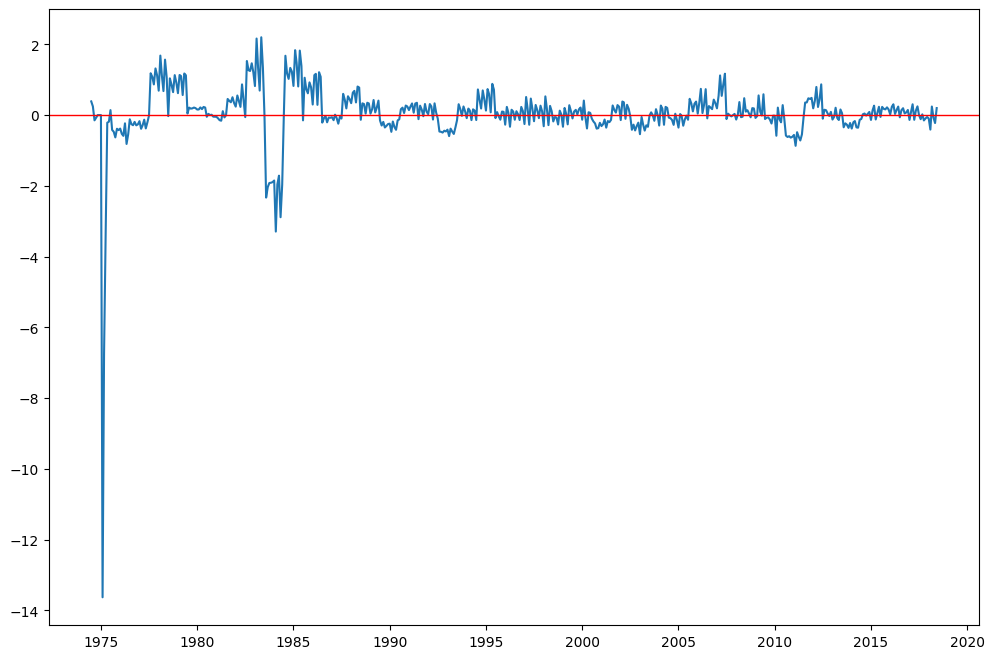

In [177]:
df_price_minus_long_monthly = pd.DataFrame(price_minus_long_monthly)
df_price_minus_long_monthly.set_index('date', inplace=True)
df_price_minus_long_monthly

df_price_minus_short_monthly = pd.DataFrame(price_minus_short_monthly)
df_price_minus_short_monthly.set_index('date', inplace=True)
df_price_minus_short_monthly

df_div_m_long_monthly = pd.DataFrame(dividends_m_long_monthly)
df_div_m_long_monthly.set_index('date', inplace=True)

df_div_m_short_monthly = pd.DataFrame(dividends_m_short_monthly)
df_div_m_short_monthly.set_index('date', inplace=True)

df_price_long_monthly = pd.DataFrame(price_long_monthly)
df_price_long_monthly.set_index('date', inplace=True)

df_price_short_monthly = pd.DataFrame(price_short_monthly)
df_price_short_monthly.set_index('date', inplace=True)

longret = (df_price_minus_long_monthly+ df_div_m_long_monthly)/df_price_long_monthly.shift(1)-1
shortret = (df_price_minus_short_monthly+df_div_m_short_monthly)/df_price_short_monthly.shift(1)-1
lsret = longret - shortret
lsret_notna = lsret.dropna()
plt.figure(figsize=(12,8))
plt.plot(lsret_notna)
plt.axhline(0, color='red', linewidth=1, linestyle='-')
lsret_notna.mean()

In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# === CONFIGURATION ===
# Replace these with your actual column names:
fundamental_cols = ['bm', 'poy', 'yy', 'beg', 'ag', 'yg', 
              'csprof', 'roe', 'gprof', 'mlev', 'blev', 'cash']
target_col = 'ME'  # Your market value proxy (e.g., Market Equity)

# === LOAD YOUR DATA ===
# df = pd.read_csv("your_data.csv")  # or use your existing DataFrame

# === SANITY CHECK ===
for col in fundamental_cols + [target_col]:
    if col not in df.columns:
        raise ValueError(f"Missing column in DataFrame: {col}")

# === HANDLE NaNs / Infs SAFELY ===
df = df.copy()

# Clean fundamental columns
for col in fundamental_cols:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = df[col].astype(float)  # ensure numeric dtype
    mean_val = df[col].mean(skipna=True)
    df[col] = df[col].fillna(mean_val)

# Clean target column
df[target_col] = df[target_col].replace([np.inf, -np.inf], np.nan)
df[target_col] = df[target_col].astype(float)
df[target_col] = df[target_col].fillna(method='ffill').fillna(method='bfill')


# === STANDARDIZE INPUTS ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[fundamental_cols])
y = df[target_col].astype(np.float32).values.reshape(-1, 1)

# === BUILD MODEL ===
input_shape = X_scaled.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)  # output = predicted fundamental value
])

model.compile(optimizer='adam', loss='mae')

# === TRAIN MODEL ===
history = model.fit(X_scaled, y, epochs=100, batch_size=64, verbose=1)

# === PREDICT FUNDAMENTAL VALUES ===
predicted_values = model.predict(X_scaled).flatten()

# === ADD TO DATAFRAME ===
df['predicted_fundamental_value'] = predicted_values
df['mispricing'] = df[target_col] - df['predicted_fundamental_value']
df['value_signal'] = -df['mispricing']  # long if undervalued, short if overvalued

# === OPTIONAL: INSPECT OUTPUT ===
print(df[['permno', 'date', 'predicted_fundamental_value', 'ME', 'value_signal']].head())


Epoch 1/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 9s 567us/step - loss: 3173462784.0000
Epoch 2/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 584us/step - loss: 3161065728.0000
Epoch 3/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 6s 535us/step - loss: 3152718848.0000
Epoch 4/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 538us/step - loss: 3103835136.0000
Epoch 5/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 543us/step - loss: 3079929088.0000
Epoch 6/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 566us/step - loss: 3002316544.0000
Epoch 7/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step - loss: 2971080448.0000
Epoch 8/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 560us/step - loss: 2992643072.0000
Epoch 9/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 559us/step - loss: 2970542848.0000
Epoch 10/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step - loss: 2963208448.0000
Epoch 11/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 558us/step - loss: 2916869376.0000
Epoch 12/100
12047/12047 ━━━━━━━━━━━━━━━━━━━━ 7s 559us/step - loss: 2932494592.0000
E

In [195]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import Hyperband
from sklearn.preprocessing import StandardScaler

# Assume X_scaled and y are already prepared
# (input cleaned, scaled, and target possibly log-transformed)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_scaled.shape[1],)))

    # Add 1 to 3 hidden layers
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"])
        ))

        if hp.Boolean("use_dropout"):
            model.add(keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.1, 0.5, step=0.1)))

    model.add(keras.layers.Dense(1))  # output layer

    # Choose optimizer and learning rate
    optimizer = keras.optimizers.Adam(
        learning_rate=hp.Float("lr", 1e-5, 1e-2, sampling="log")
    )

    model.compile(optimizer=optimizer, loss="mse")
    return model


In [196]:
tuner = Hyperband(
    build_model,
    objective="val_loss",
    max_epochs=50,
    factor=3,
    directory="nn_tuning",
    project_name="intrinsic_value_model"
)

# Optional: Stop early if no improvement
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

# Split training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Start search
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val),
             callbacks=[stop_early],
             batch_size=64)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 90 Complete [00h 05m 03s]
val_loss: 2.7125907112936132e+20

Best val_loss So Far: 2.428300281128409e+20
Total elapsed time: 02h 03m 45s


In [201]:
best_hps= tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

KeyError: 'learning_rate does not exist.'

In [192]:
#Value Weighted Portfolio using Fundamental-to-Market Ratio
import matplotlib.pyplot as plt

df['fundamental-market-ratio-nn'] = df['predicted_fundamental_value']/df['ME']
fm = df.pivot(index='date', columns='permno', values='fundamental-market-ratio-nn')


long_short_returns = []
log_returns = []

price_long_ts = []
dividends_long_ts = []
fundamental_value_long_ts = []  # Changed from bookvalue_long_ts
price_minus_long_ts = []
fundamental_value_minus_long_ts = []  # Changed from bookvalue_minus_long_ts
dividends_m_long_ts = []
dividends_m_short_ts = []
long_log_returns = []

price_short_ts = []
dividends_short_ts = []
fundamental_value_short_ts = []  # Changed from bookvalue_short_ts
price_minus_short_ts = []
fundamental_value_minus_short_ts = []  # Changed from bookvalue_minus_short_ts
short_log_returns = []

portfolio_value_long = []
portfolio_value_short = []

top_permno_all = []
bottom_permno_all = []

top_permnos = []
bottom_permnos = []

long_ret = []
pf_long = []  # Changed from pb_long (price-to-fundamental)
pf_short = []  # Changed from pb_short (price-to-fundamental)
fv_pershare_short = []  # Changed from bv_pershare_short

ann_ret_long = []
ann_ret_short = []

price_minus_long_monthly = []
price_minus_short_monthly = []

fundamental_value_minus_long_monthly = []  # Changed from bookvalue_minus_long_monthly
fundamental_value_minus_short_monthly = []  # Changed from bookvalue_minus_short_monthly
fundamental_value_long_monthly = []  # Changed from bookvalue_long_monthly
fundamental_value_short_monthly = []  # Changed from bookvalue_short_monthly

dividends_m_long_monthly = []
dividends_m_short_monthly = []

price_long_monthly = []
price_short_monthly = []

stock_duration_tracker = {}  # Will track how long each stock stays in value/growth
portfolio_compositions = {
    'value': {},  # year: [list of permnos]
    'growth': {}  # year: [list of permnos]
}
duration_results = {
    'value': [],
    'growth': []
}

# Use either fm_bounded from df_var or fm wide-format DataFrame for sorting
# If using wide-format fm DataFrame:
if 'fm' in locals() or 'fm' in globals():
    fm_data = fm
    sorting_method = 'wide_format'
else:
    # If using fm_bounded from df_var, we'll need to pivot it to wide format
    sorting_method = 'long_format'

for year in sorted(set(date.year for date in fm.index)):
    fv_long_monthly = []  
    fv_short_monthly = []  

    div_short_monthly = []
    div_long_monthly = []

    date = pd.Timestamp(f"{year}-06")
    date_dec = pd.Timestamp(f"{year-1}-06")
    
    # Check if date exists in fm data
    if sorting_method == 'wide_format':
        if date_dec not in fm.index:
            continue
    else:
        # For long format, check if we have data for this date
        if not any(df_var['date'] == date_dec):
            continue

    # Timeframe: July-June
    month_range = pd.date_range(start=date + pd.DateOffset(months=1), periods=12, freq="ME")
    month_range = month_range.to_period('M')

    target_date = f"{year}-06" 
    top_date = pd.to_datetime(target_date)
    df_var['date'] = pd.to_datetime(df_var['date'])

    #Since the dataset contains data upto December 2018 and the fiscal year begins in June the loop would try to access data in 2019
    if year == 2018:
        continue 

    """"
        Computation of X_t-: The evaluation of the past portfolio at the day of the rebalancing.

        In means of cleaner code, the positions of the past portfolio will be accessed before the new stocks are being selected.
        Therefore the first year would cause an exception, which will be treated by adding NaN values in the first year.
    """

    #Top Permnos
    if len(top_permnos) == 0:
        print("This is year: ", year)
        price_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_long_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        shrout_series_m_long = shrout_filtered_m_long.set_index('permno')['adj_shrout']
        top_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_m_long = shrout_series_m_long.reindex(top_m_prc.index) *1000
        long_m_prc = top_m_prc * sharesoutstanding_m_long
        price_minus_long_ts.append({"date" : top_date, "avg_value" : sum(long_m_prc)})"""
        
        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_long = df[(df['date'] == top_date) & (df['permno'].isin(top_permnos))]
        fundamental_series_m_long = fundamental_filtered_m_long.set_index('permno')['FE']
        top_m_fv = fundamental_series_m_long.reindex(top_m_prc.index).dropna()
        fundamental_value_minus_long_ts.append({"date" : f"{year}-06", "avg_value" : sum(top_m_fv)})"""

        """#Annual Returns
        ann_top_rets = returns.loc[f'{year}-06', returns.columns.intersection(top_permnos)]
        ann_avg_top_rets = np.nanmean(ann_top_rets)
        ann_ret_long.append({'date': f'{year}-06', 'ann_ret_long': ann_avg_top_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            shrout_series_m_long_monthly = shrout_filtered_m_long_monthly.set_index('permno')['adj_shrout']
            top_m_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_prc = shrout_series_m_long_monthly.reindex(top_m_prc_monthly.index) *1000
            long_m_prc_monthly = top_m_prc_monthly * sharesoutstanding_long_m_prc
            price_minus_long_monthly.append({'date': date, 'avg_value': long_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
            fundamental_series_m_long_monthly = fundamental_filtered_m_long_monthly.set_index('permno')['FE']
            top_m_fv_monthly = fundamental_series_m_long_monthly.reindex(top_m_prc_monthly.index).dropna()
            fundamental_value_minus_long_monthly.append({'date': date, 'fundamental_value': top_m_fv_monthly.sum()})"""

            #Dividends
            top_m_div = dividends.loc[date, dividends.columns.intersection(top_permnos)].dropna()
            sharesoutstanding_long_m_div = shrout_series_m_long_monthly.reindex(top_m_div.index) *1000
            long_m_div = top_m_div * sharesoutstanding_long_m_div
            dividends_m_long_monthly.append({"date" : date, "avg_value" :long_m_div.sum()})

    #Bottom Permnos
    if len(bottom_permnos) == 0:
        print("This is year (bottom): ", year)
        price_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : np.nan})
        dividends_m_short_ts.append({'date': f'{year}-06', 'avg_value': np.nan})
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': np.nan})
    else:
        """#Market Capitalization
        shrout_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_m_short = shrout_filtered_m_short.set_index('permno')['adj_shrout']
        bottom_m_prc = price.loc[(f"{year}-06"), price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_m_short = shrout_series_m_short.reindex(bottom_m_prc.index) * 1000
        short_m_prc = bottom_m_prc * sharesoutstanding_m_short
        price_minus_short_ts.append({"date" : top_date, "avg_value" :sum(short_m_prc)})"""

        """#Fundamental Value (replacing book value)
        fundamental_filtered_m_short = df[(df['date'] == top_date) & (df['permno'].isin(bottom_permnos))]
        fundamental_series_m_short = fundamental_filtered_m_short.set_index('permno')['FE']
        bottom_m_fv = fundamental_series_m_short.reindex(bottom_m_prc.index).dropna()
        fundamental_value_minus_short_ts.append({"date" : f"{year}-06", "avg_value" : sum(bottom_m_fv)})"""

        """#Annual Returns
        ann_bottom_rets = returns.loc[f'{year}-06', returns.columns.intersection(bottom_permnos)]
        ann_avg_bottom_rets = np.nanmean(ann_bottom_rets)
        ann_ret_short.append({'date': f'{year}-06', 'ann_ret_short': ann_avg_bottom_rets})"""

        for m in month_range:
            #Computations for monthly returns
            date = m.to_timestamp()
            shrout_filtered_m_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
            shrout_series_m_short_monthly = shrout_filtered_m_short_monthly.set_index('permno')['adj_shrout']
            bottom_m_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_prc_monthly = shrout_series_m_short_monthly.reindex(bottom_m_prc_monthly.index) *1000
            short_m_prc_monthly = bottom_m_prc_monthly * sharesoutstanding_short_m_prc_monthly
            price_minus_short_monthly.append({'date': date, 'avg_value': short_m_prc_monthly.sum()})

            """#Fundamental Value (replacing book value)
            fundamental_filtered_m_short_monthly = df[(df_var['date'] == date) & (df['permno'].isin(bottom_permnos))]
            fundamental_series_m_short_monthly = fundamental_filtered_m_short_monthly.set_index('permno')['FE']
            bottom_m_fv_monthly = fundamental_series_m_short_monthly.reindex(bottom_m_prc_monthly.index).dropna()
            fundamental_value_minus_short_monthly.append({'date': date, 'fundamental_value': bottom_m_fv_monthly.sum()})"""

            #Dividends
            bottom_m_div = dividends.loc[date, dividends.columns.intersection(bottom_permnos)].dropna()
            sharesoutstanding_short_m_div = shrout_series_m_short_monthly.reindex(bottom_m_div.index) *1000
            short_m_div = bottom_m_div * sharesoutstanding_short_m_div
            dividends_m_short_monthly.append({"date" : date, "avg_value" :short_m_div.sum()})

    """"
        Stock Selection using Fundamental-to-Market Ratio:

        All stocks in the available dataset are being sorted in a descending order by fundamental-to-market ratio.
        Higher fundamental-to-market ratios indicate value stocks (high fundamental value relative to market price).
        Lower fundamental-to-market ratios indicate growth stocks (low fundamental value relative to market price).

        The top 30% of stocks (highest fundamental-to-market ratio) are selected for long positions (value stocks).
        The bottom 30% of stocks (lowest fundamental-to-market ratio) are selected for short positions (growth stocks).
    """
    
    # Sort by fundamental-to-market ratio
    if sorting_method == 'wide_format':
        # Use wide-format fm DataFrame
        clean_row = fm.loc[date_dec].dropna().sort_values(ascending=False)
    else:
        # Use fm_bounded from df_var (pivot to wide format for this date)
        date_data = df_var[df_var['date'] == date_dec]
        fm_series = date_data.set_index('permno')['fm_bounded'].dropna()
        clean_row = fm_series.sort_values(ascending=False)
    
    n = len(clean_row)
    if n == 0:
        continue

    k = int(n * 0.3)
    # Top 30% have highest fundamental-to-market ratios (value stocks)
    top_permnos = clean_row.iloc[:k].index.tolist()
    # Bottom 30% have lowest fundamental-to-market ratios (growth stocks)
    bottom_permnos = clean_row.iloc[-k:].index.tolist() 

    top_permno_year = pd.DataFrame({"date": date, "permno": top_permnos}) 
    top_permno_all.append(top_permno_year)

    bottom_permno_year = pd.DataFrame({"date": date, "permno": bottom_permnos})
    bottom_permno_all.append(bottom_permno_year)

    """
        Track Stocks in Value/Growth Portfolio
    """

    # Store portfolio compositions for duration analysis
    portfolio_compositions['value'][year] = top_permnos.copy()
    portfolio_compositions['growth'][year] = bottom_permnos.copy()

    # Track duration for each stock
    for permno in top_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'value':
                # Stock continues in value portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from growth to value - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'value', 'start_year': year, 'consecutive_years': 1}

    for permno in bottom_permnos:
        if permno not in stock_duration_tracker:
            stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}
        else:
            if stock_duration_tracker[permno]['type'] == 'growth':
                # Stock continues in growth portfolio
                stock_duration_tracker[permno]['consecutive_years'] += 1
            else:
                # Stock switched from value to growth - record previous duration and restart
                prev_duration = stock_duration_tracker[permno]['consecutive_years']
                duration_results[stock_duration_tracker[permno]['type']].append({
                    'permno': permno,
                    'duration': prev_duration,
                    'end_year': year - 1,
                    'start_year': stock_duration_tracker[permno]['start_year']
                })
                stock_duration_tracker[permno] = {'type': 'growth', 'start_year': year, 'consecutive_years': 1}

    """
        Computation of current values:

        After the new stocks have been selected the values of P_t+, F_t+ and D_t+ will
        be computed using the fundamental-to-market based selection.
        (F_t+ replaces B_t+ as we're using fundamental value instead of book value)
    """

    #Portfolio weighted market capitalization      Long (Value stocks)
    shrout_filtered_long = df[(df['date'] == f'{year}-06') & (df['permno'].isin(top_permnos))]
    shrout_series_long = shrout_filtered_long.set_index('permno')['adj_shrout']

    top_prc = price.loc[f'{year}-06', price.columns.intersection(top_permnos)].dropna()
    sharesoutstanding_long = shrout_series_long.reindex(top_prc.index) *1000
    long_prc = top_prc * sharesoutstanding_long
    price_long_ts.append({'date': f'{year}-06', 'avg_value': long_prc.sum()})  

    #Portfolio weighted market capitalization      Short (Growth stocks)
    shrout_filtered_short = df[(df['date'] == f'{year}-06') & (df['permno'].isin(bottom_permnos))]
    shrout_series_short = shrout_filtered_short.set_index('permno')['adj_shrout']

    bottom_prc = price.loc[f'{year}-06', price.columns.intersection(bottom_permnos)].dropna()
    sharesoutstanding_short = shrout_series_short.reindex(bottom_prc.index) *1000
    short_prc = bottom_prc * sharesoutstanding_short
    price_short_ts.append({'date': f'{year}-06', 'avg_value': short_prc.sum()})

    """#Fundamental Value (replacing book value)
    fundamental_filtered_long = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(top_permnos))]
    fundamental_series_long = fundamental_filtered_long.set_index('permno')['FE']
    top_fv = fundamental_series_long.reindex(top_prc.index).dropna()
    fundamental_value_long_ts.append({'date': f'{year}-06', 'avg_value' : top_fv.sum()}) 

    fundamental_filtered_short = df_var[(df_var['date'] == f'{year}-06') & (df_var['permno'].isin(bottom_permnos))]
    fundamental_series_short = fundamental_filtered_short.set_index('permno')['FE']
    bottom_fv = fundamental_series_short.reindex(bottom_prc.index).dropna()
    fundamental_value_short_ts.append({'date': f'{year}-06', 'avg_value' : bottom_fv.sum()})"""
    
    # Price-to-Fundamental ratios (replacing price-to-book)
    pf_long.append({'date': f'{year}-06', 'pf_long' : long_prc.sum()/top_fv.sum() if top_fv.sum() != 0 else np.nan})
    pf_short.append({'date': f'{year}-06', 'pf_short': short_prc.sum()/bottom_fv.sum() if bottom_fv.sum() != 0 else np.nan})

    for m in month_range:
        """if m not in returns.index:
            print("m not in returns.index", m)
            continue"""
        
        #Computations for monthly returns
        date = m.to_timestamp()
        #Short-Positions (Growth stocks)
        shrout_filtered_short_monthly = df[(df['date'] == date) & (df['permno'].isin(bottom_permnos))]
        shrout_series_short_monthly = shrout_filtered_short_monthly.set_index('permno')['adj_shrout']
        bottom_prc_monthly = price.loc[date, price.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_prc_monthly = shrout_series_short_monthly.reindex(bottom_prc_monthly.index) *1000
        short_prc_monthly = bottom_prc_monthly * sharesoutstanding_short_prc_monthly
        if short_prc_monthly.notna().any():
            price_short_monthly.append({'date': date, 'avg_value': short_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")
        
        #Long-Positions (Value stocks)
        shrout_filtered_long_monthly = df[(df['date'] == date) & (df['permno'].isin(top_permnos))]
        shrout_series_long_monthly = shrout_filtered_long_monthly.set_index('permno')['adj_shrout']
        top_prc_monthly = price.loc[date, price.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_prc_monthly = shrout_series_long_monthly.reindex(top_prc_monthly.index) *1000
        long_prc_monthly = top_prc_monthly * sharesoutstanding_long_prc_monthly
        if long_prc_monthly.notna().any():
            price_long_monthly.append({'date': date, 'avg_value': long_prc_monthly.sum()})
        else:
            print(f"No valid prices for {date} — skipping.")

        """top_rets = returns.loc[m, returns.columns.intersection(top_permnos)]
        bottom_rets = returns.loc[m, returns.columns.intersection(bottom_permnos)]"""

        #Dividends
        top_div = dividends.loc[m, dividends.columns.intersection(top_permnos)].dropna()
        sharesoutstanding_long_div = shrout_series_long_monthly.reindex(top_div.index) *1000
        long_div = top_div * sharesoutstanding_long_div
        div_long_monthly.append({'date': date, 'avg_value' : long_div.sum()})

        bottom_div = dividends.loc[m, dividends.columns.intersection(bottom_permnos)].dropna()
        sharesoutstanding_short_div = shrout_series_short_monthly.reindex(bottom_div.index) *1000
        short_div = bottom_div * sharesoutstanding_short_div
        div_short_monthly.append({'date': date, 'avg_value' : short_div.sum()})

        """#Fundamental Value monthly (replacing book value monthly)
        fundamental_filtered_short_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(bottom_permnos))]
        fundamental_series_short_monthly = fundamental_filtered_short_monthly.set_index('permno')['FE']
        bottom_fv_monthly = fundamental_series_short_monthly.reindex(bottom_prc_monthly.index).dropna()
        fundamental_value_short_monthly.append({'date': date, 'fundamental_value': bottom_fv_monthly.sum()})

        fundamental_filtered_long_monthly = df_var[(df_var['date'] == date) & (df_var['permno'].isin(top_permnos))]
        fundamental_series_long_monthly = fundamental_filtered_long_monthly.set_index('permno')['FE']
        top_fv_monthly = fundamental_series_long_monthly.reindex(top_prc_monthly.index).dropna()
        fundamental_value_long_monthly.append({'date': date, 'fundamental_value': top_fv_monthly.sum()})"""

        if top_rets.empty or bottom_rets.empty:
            continue

        avg_top = np.nanmean(top_rets)
        avg_bottom = np.nanmean(bottom_rets)
        spread = avg_top - avg_bottom

        long_short_returns.append((m, spread))
        long_ret.append({"date": date, "return": (top_prc/top_prc.shift(1))})

    dividends_long_ts.extend(div_long_monthly)
    dividends_short_ts.extend(div_short_monthly)   
    
# Convert to DataFrame and set index
df_ls = pd.DataFrame(long_short_returns, columns=["date", "long_short_ret"])
df_ls.set_index("date", inplace=True)            

# Calculate cumulative return
df_ls['cumret'] = (df_ls['long_short_ret']).cumprod()
df_ls['cumret'] = pd.to_numeric(df_ls['cumret'], errors='coerce')

"""# Plot
df_ls['cumret'].plot(title="Cumulative Long-Short Return (Fundamental-to-Market Strategy)", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()"""

# Print summary statistics
print("Summary Statistics for Fundamental-to-Market Strategy:")
#print(f"Total Return: {df_ls['cumret'].iloc[-1]:.2%}")
#print(f"Annualized Return: {(1 + df_ls['cumret'].iloc[-1])**(12/len(df_ls)) - 1:.2%}")
print(f"Volatility: {df_ls['long_short_ret'].std() * np.sqrt(12):.2%}")
print(f"Sharpe Ratio: {df_ls['long_short_ret'].mean() / df_ls['long_short_ret'].std() * np.sqrt(12):.2f}")

This is year:  1973
This is year (bottom):  1973
No valid prices for 1973-09-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-10-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-11-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1973-12-01 00:00:00 — skipping.
No valid prices for 1974-01-01 00:00:00 — skipping.
No valid prices for 1974-01-01 00:00:00 — skipping.
No valid prices for 1974-02-01 00:00:00 — skipping.
No valid prices for 1974-10-01 00:00:00 — skipping.
Summary Statistics for Fundamental-to-Market Strategy:
Volatility: 0.00%
Sharpe Ratio: 21883160416887348.00


avg_value    0.014664
dtype: float64

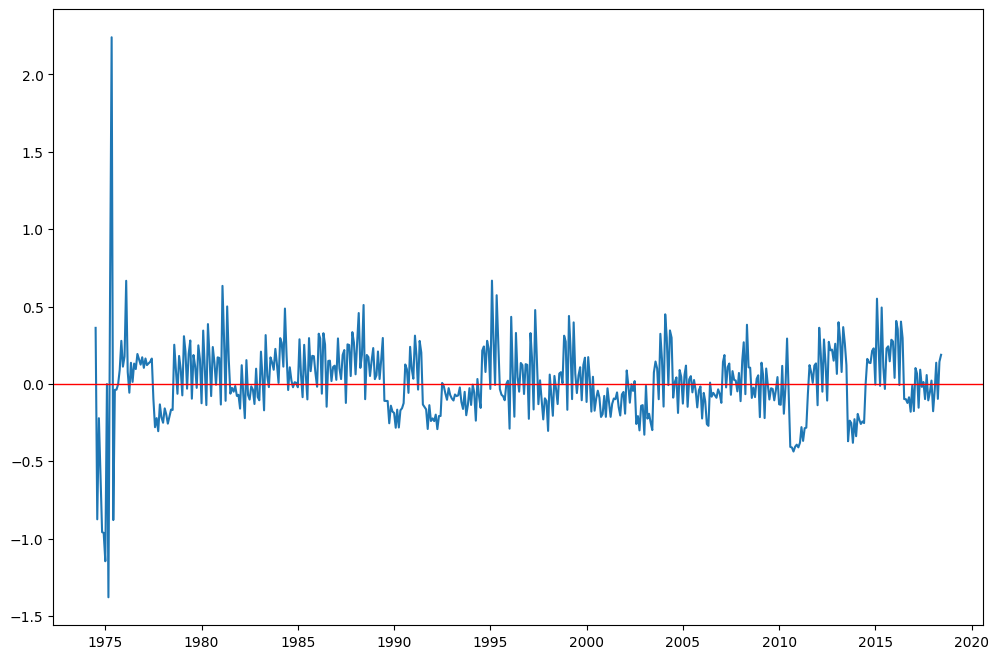

In [193]:
df_price_minus_long_monthly = pd.DataFrame(price_minus_long_monthly)
df_price_minus_long_monthly.set_index('date', inplace=True)
df_price_minus_long_monthly

df_price_minus_short_monthly = pd.DataFrame(price_minus_short_monthly)
df_price_minus_short_monthly.set_index('date', inplace=True)
df_price_minus_short_monthly

df_div_m_long_monthly = pd.DataFrame(dividends_m_long_monthly)
df_div_m_long_monthly.set_index('date', inplace=True)

df_div_m_short_monthly = pd.DataFrame(dividends_m_short_monthly)
df_div_m_short_monthly.set_index('date', inplace=True)

df_price_long_monthly = pd.DataFrame(price_long_monthly)
df_price_long_monthly.set_index('date', inplace=True)

df_price_short_monthly = pd.DataFrame(price_short_monthly)
df_price_short_monthly.set_index('date', inplace=True)

longret = (df_price_minus_long_monthly+ df_div_m_long_monthly)/df_price_long_monthly.shift(1)-1
shortret = (df_price_minus_short_monthly+df_div_m_short_monthly)/df_price_short_monthly.shift(1)-1
lsret = longret - shortret
lsret_notna = lsret.dropna()
plt.figure(figsize=(12,8))
plt.plot(lsret_notna)
plt.axhline(0, color='red', linewidth=1, linestyle='-')
lsret_notna.mean()